## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [7]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Nobody\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Nobody\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Nobody\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\Nobody\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [9]:
# Step 1 Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster



## Loading the dataset

In [11]:
df = pd.read_csv('C:\\Users\\Nobody\\Downloads\\school stuff\\personal loan campaign\\Loan_Modelling.csv')
    

## Data Overview

* Observations
* Sanity checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<Figure size 3000x1500 with 0 Axes>

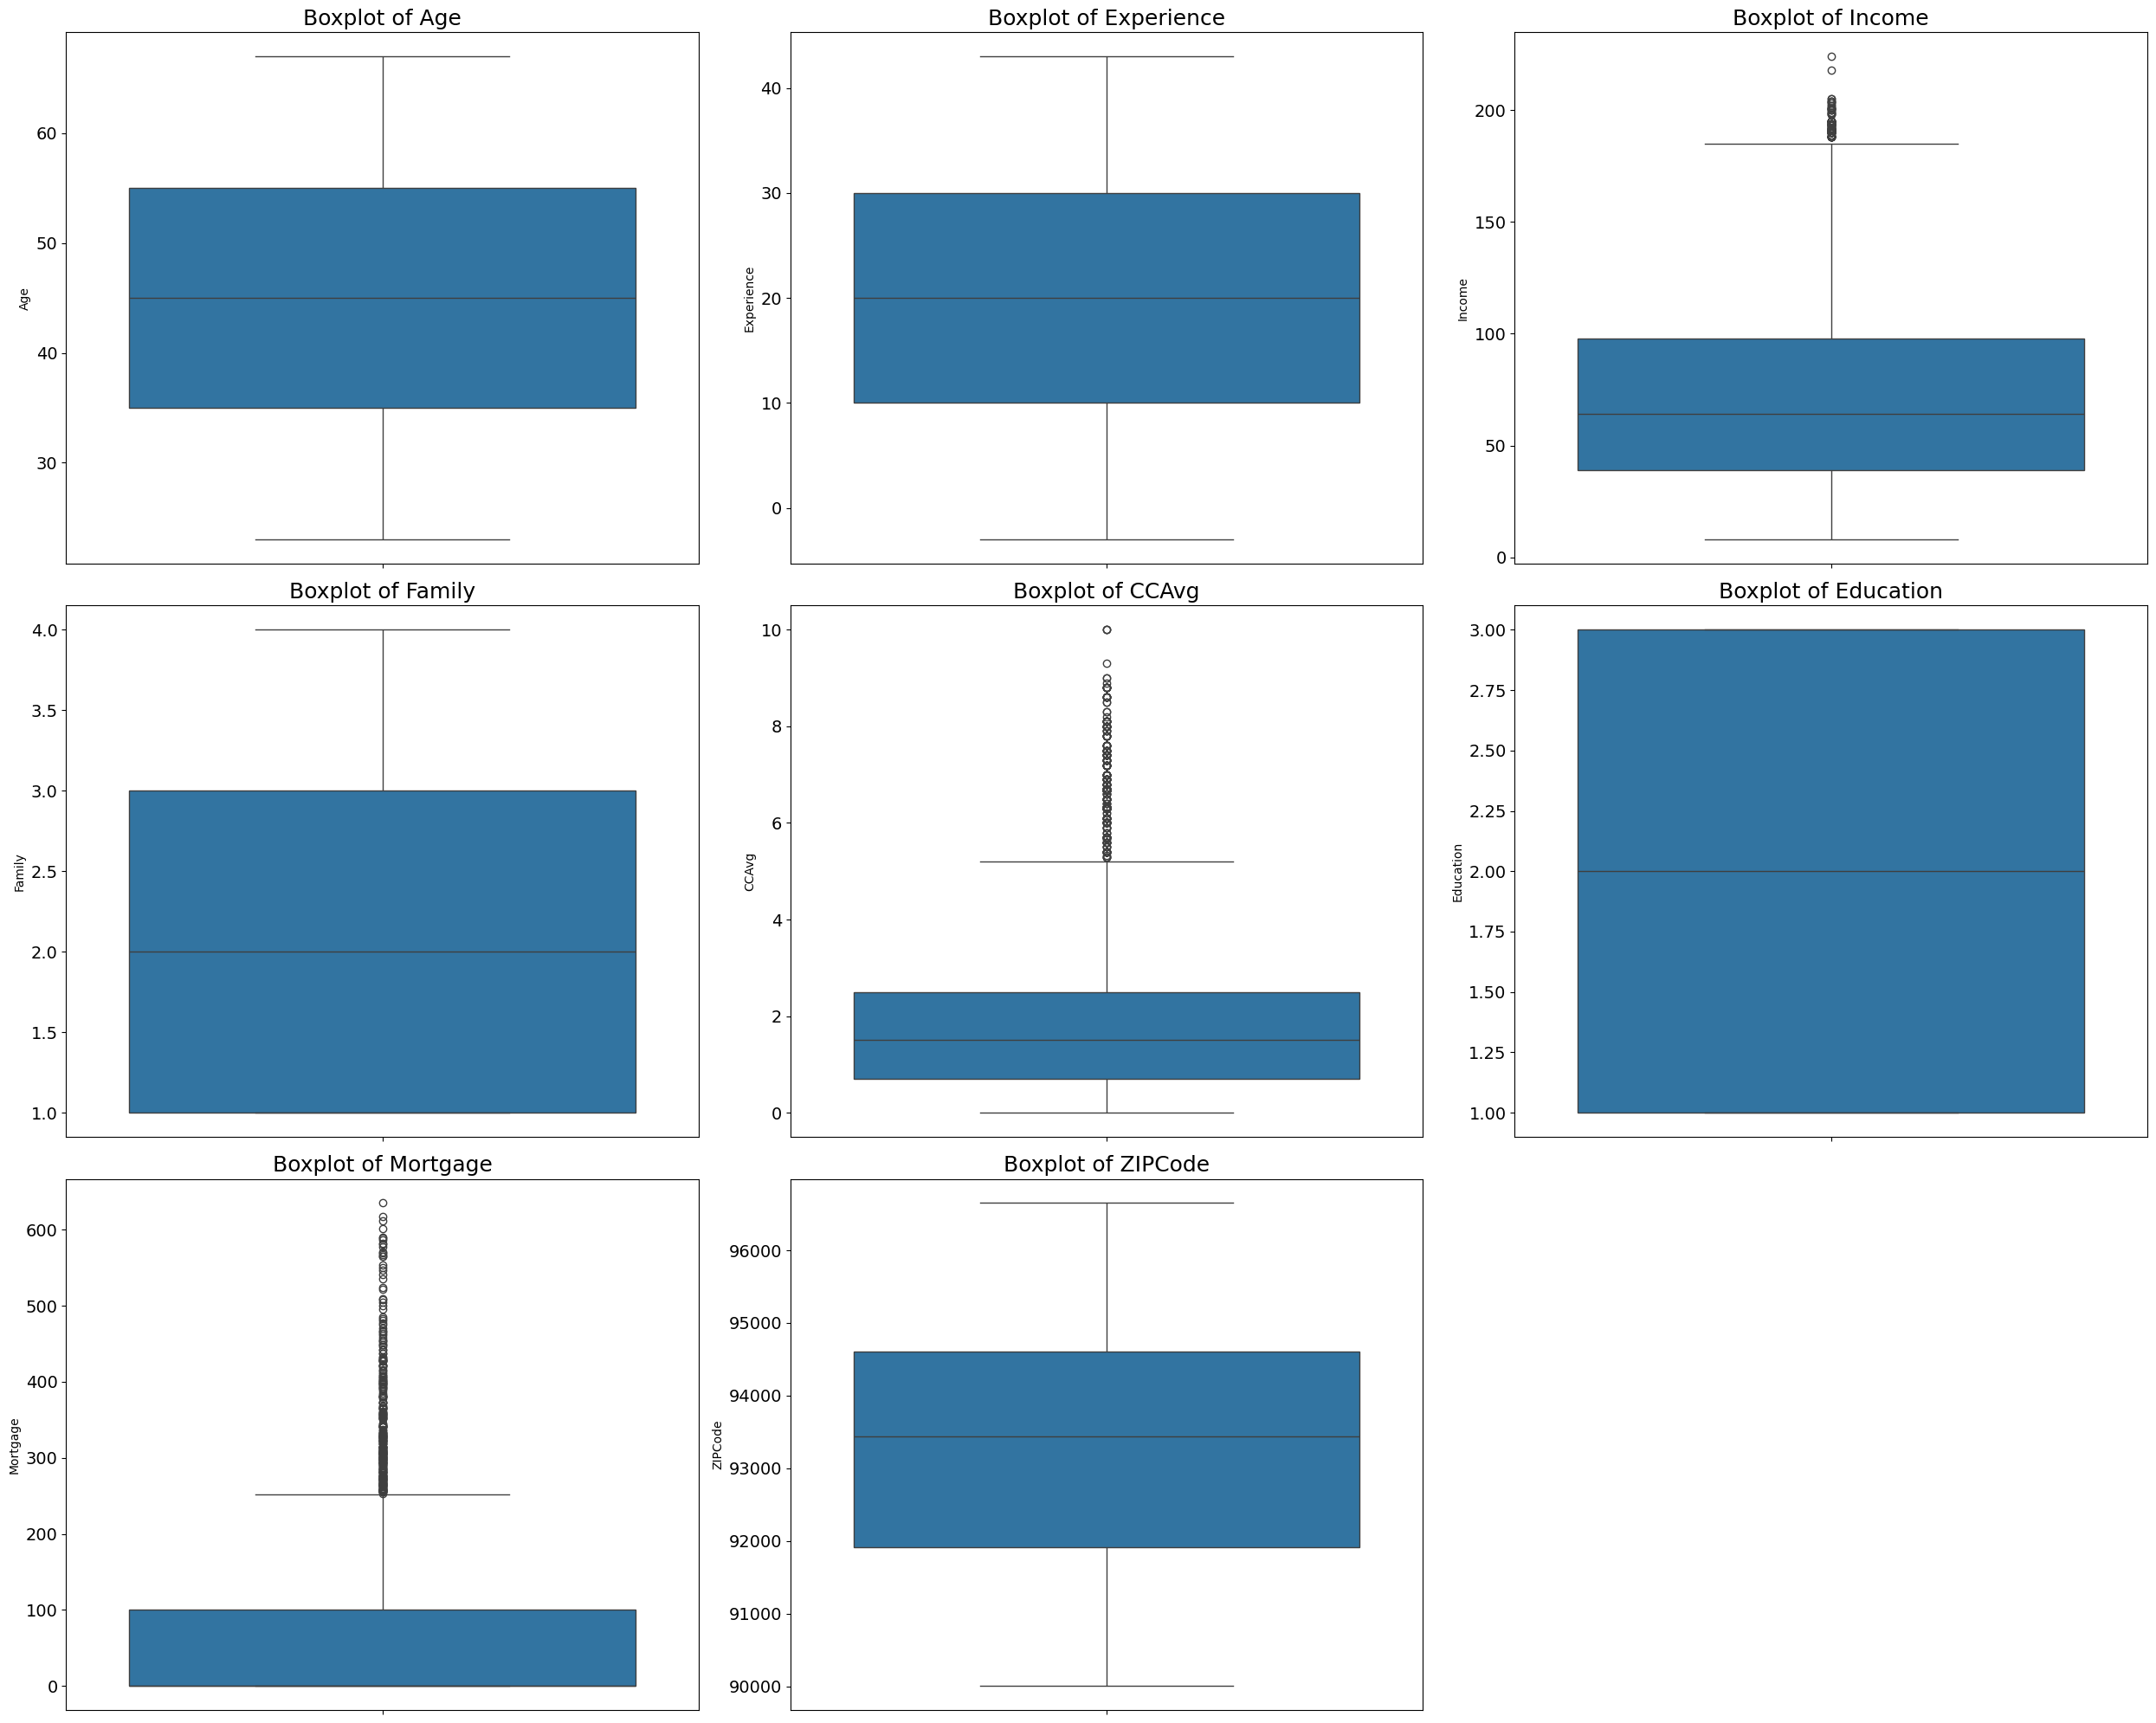

In [14]:
# lets get a general understanding of the dataset 
# step (1)  make an orginal copy
# duplicate the datset
original_df = df.copy()
#step 1 :Check the first few rows 
df.head()
# proceed to next phase, sanity checks and conclude with my observation
# step 2 :check for structure of the data (columns, and types, etc)

df.info()
# step 3: lets find out the basic statistics

df.describe()
# step 4: check for missing values in the dataset
df.isnull().sum()
# step 5: lets check for duplicate rows
df.duplicated().sum()
# step 6: review column names 
df.columns
#  step 7: check for outliers
plt.figure(figsize = (30, 15))

# step 8 make graphs to see, obserations in data

# list of columns for boxplots
columns_to_plot = ['Age', 'Experience' , 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'ZIPCode']

# Adjust the figure size to be large enough for mutliple sublpots
plt.figure(figsize = (25, 20))

# Loop through each column and create individual boxplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3,3, i) # Create a grid with 3 rows and 3 columns 
    sns.boxplot(data = df[col])
    plt.title(f'Boxplot of {col}', fontsize = 18)
    plt.xticks(fontsize = 14 )
    plt.yticks(fontsize = 14 )

plt.tight_layout()



In [15]:
'''
Age Distribution: Median age around 45, with most customers between 35-55.
Experience: Closely tracks with age, 10-30 years professional experience.
Income: Median around $75K, with outliers reaching $200K
Statistical Insight: Income shows significant outliers above $150K, representing high-value potential customers


Customer Profile Metrics:


Family Size: Most families between 1-3 members
CCAvg (Credit Card Spending): Median around $2K monthly, with notable outliers up to $10K
Education: Three distinct levels, relatively even distribution
Mortgage: Most under $100K, with outliers up to $600K

business recommendation: 
Age Distribution: Median age around 45, with most customers between 35-55
Experience: Closely tracks with age, 10-30 years professional experience
Income: Median around $75K, with outliers reaching $200K
Statistical Insight: Income shows significant outliers above $150K, representing high-value potential customers


business recommendation : 
Create segmented campaigns targeting for Mid-career professionals ,
becuase there around (35-55 age group), High credit card spenders 
(>$4K monthly)
Customers with manageable mortgage levels (<$200K)

consulting recomedation: 
High Credit Card Spenders: Offer exclusive credit card rewards tailored to
their spending patterns, such as cashback or loyalty points on specific 
categories like travel, dining, or entertainment.such as offering benefits ,
like exclusive event invites, luxury perks, or concierge services( fancy term
for personal services provided. like facilities that provide service like ,
personal assistannce, chauffer services, etc).

Manageable Mortgage Holders: Promote refinancing options with competitive
interest 
rates or home equity lines of credit , to help them make the most of their 
manageable mortgage levels.

Mid-career Professionals: Focus on retirement planning tools, 
investment opportunities (such as, 401(k) rollovers), or 
wealth management services to assist in wealth accumulation during 
their peak earning years.

we can also Cross-Sell Financial Products: Offer bundled products where
these customers receive discounts on financial services if they combine 
multiple products (e.g., credit cards, home loans, investment accounts)

'''

'\nAge Distribution: Median age around 45, with most customers between 35-55.\nExperience: Closely tracks with age, 10-30 years professional experience.\nIncome: Median around $75K, with outliers reaching $200K\nStatistical Insight: Income shows significant outliers above $150K, representing high-value potential customers\n\n\nCustomer Profile Metrics:\n\n\nFamily Size: Most families between 1-3 members\nCCAvg (Credit Card Spending): Median around $2K monthly, with notable outliers up to $10K\nEducation: Three distinct levels, relatively even distribution\nMortgage: Most under $100K, with outliers up to $600K\n\nbusiness recommendation: \nAge Distribution: Median age around 45, with most customers between 35-55\nExperience: Closely tracks with age, 10-30 years professional experience\nIncome: Median around $75K, with outliers reaching $200K\nStatistical Insight: Income shows significant outliers above $150K, representing high-value potential customers\n\n\nbusiness recommendation : \nC

In [16]:
print(df.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


# Pairplot (Scatterplot Matrix)

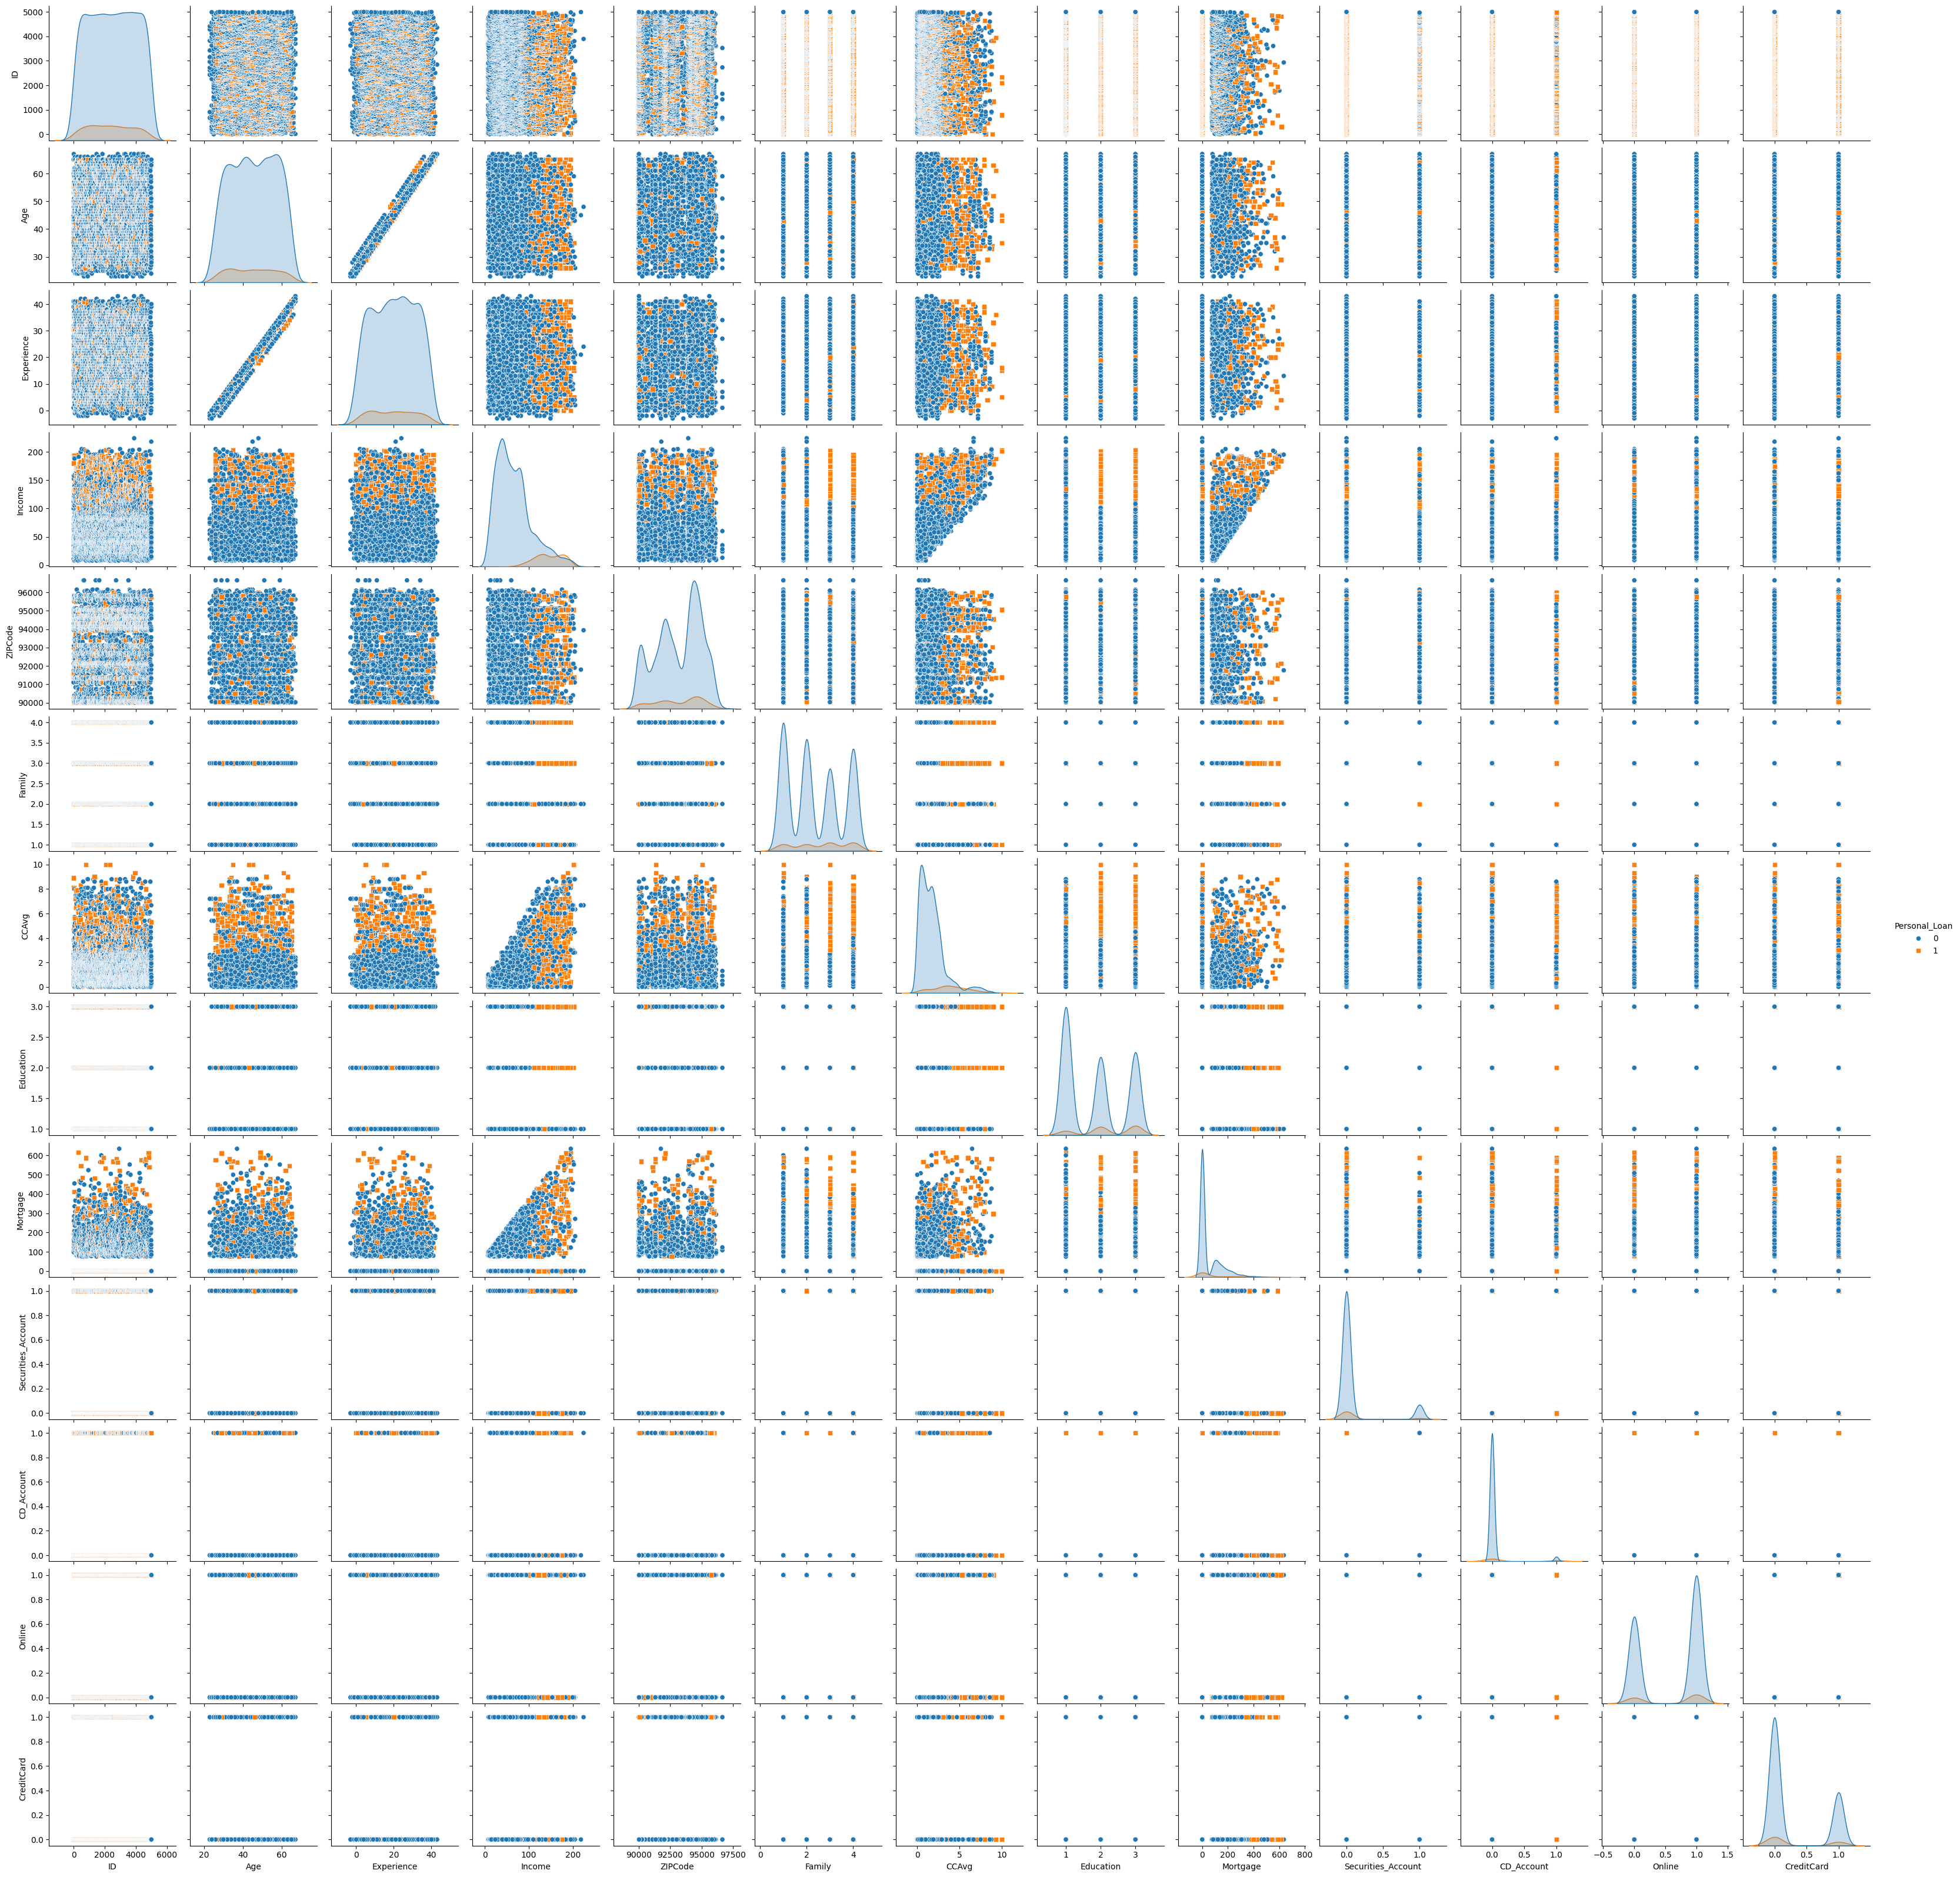

In [18]:
sns.pairplot(df, hue='Personal_Loan', diag_kind='kde', markers=["o", "s"])
plt.show()

In [19]:
'''


 Analysis:
Securities Account:


Low overall adoption
Slight correlation with loan acceptance
CD Account:
Moderate adoption
Higher correlation with loan acceptance
Marketing Recommendation: Cross-sell personal loans to 
CD account holders as they show higher propensity to accept.

Feature Correlations (Scatter Matrix):
Age vs. Experience:


Strong positive linear correlation
Most customers between 30-60 years old
Experience ranges 10-30 years
Marketing Recommendation: Target mid-career professionals (35-50 age range) 
with established careers but ongoing financial needs.

Income vs. CCAvg:

Strong positive correlation
Higher income customers spend more on credit cards
Clear segmentation visible
Marketing Recommendation: Focus on customers with high credit card spending 
(>3K monthly) as they're more likely to accept loans.

'''

"\n\n\n Analysis:\nSecurities Account:\n\n\nLow overall adoption\nSlight correlation with loan acceptance\nCD Account:\nModerate adoption\nHigher correlation with loan acceptance\nMarketing Recommendation: Cross-sell personal loans to \nCD account holders as they show higher propensity to accept.\n\nFeature Correlations (Scatter Matrix):\nAge vs. Experience:\n\n\nStrong positive linear correlation\nMost customers between 30-60 years old\nExperience ranges 10-30 years\nMarketing Recommendation: Target mid-career professionals (35-50 age range) \nwith established careers but ongoing financial needs.\n\nIncome vs. CCAvg:\n\nStrong positive correlation\nHigher income customers spend more on credit cards\nClear segmentation visible\nMarketing Recommendation: Focus on customers with high credit card spending \n(>3K monthly) as they're more likely to accept loans.\n\n"

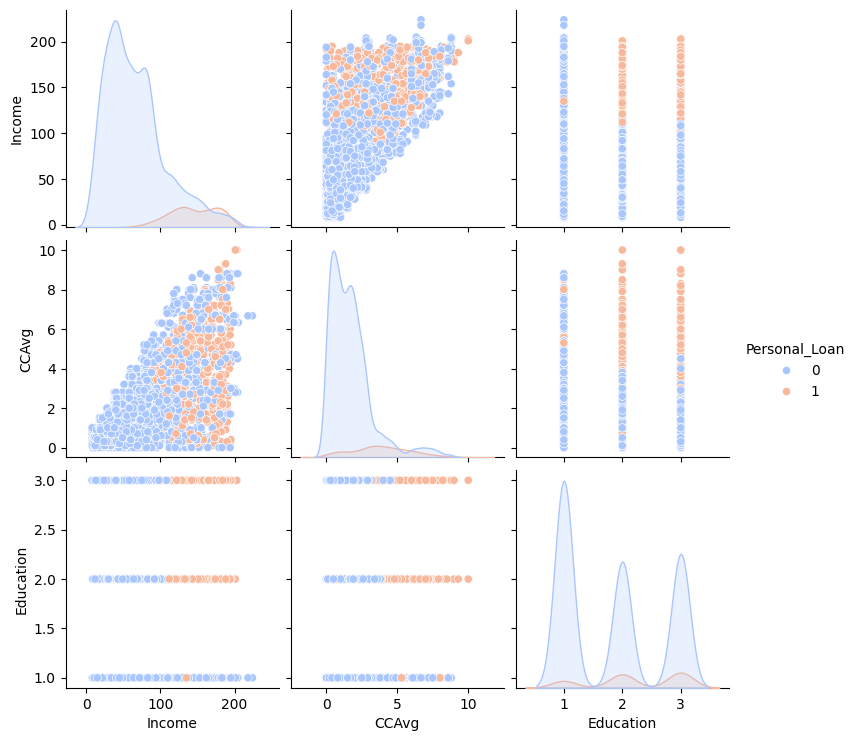

In [20]:
# creating  a more focused Pair plot

# selected variables to focus on : income, CCAvg, Education
selected_columns = ['Income', 'CCAvg', 'Education', 'Personal_Loan']

# Create the focused pair plot with Personal_Loan as the hue
sns.pairplot(df[selected_columns], hue = 'Personal_Loan', diag_kind = 'kde', palette = 'coolwarm')

# print chart
plt.savefig('focusedPairPlot.png') # saves the plot as png file

# show the plot
plt.show()


In [21]:
'''

analysis from the focus pair plot 
Income Distribution (Top Left):
distribution with main peak around $45-75K.
Secondary smaller peak around $150K.
Blue (non-loan customers), dominates lower income ranges.
Orange (loan customers) ,more prevalent in higher income ranges.
Clear indication that higher income correlates with loan acceptance.


Income vs CCAvg (Middle Plot):
Strong positive correlation between income and credit card spending.
Fan-shaped pattern indicates increasing variance with income.
Loan customers (orange) appear more concentrated in ,
higher income/CCAvg combinations.
 insight: Higher credit card spenders with higher incomes are more 
likely to accept loans
.

Education Level Distribution (Right Column):
There are three distinct education levels (1: Undergrad, 2: Graduate, 3: 
Advanced/Professional).
Relatively even distribution across levels, and 
Slightly higher loan acceptance rates ,(orange) in higher education levels.
Each education level shows distinct loan acceptance patterns.


CCAvg Distribution (Middle Row):
Right-skewed distribution
Most customers spend between 0-4K monthly on credit cards
Higher credit card spenders show greater loan acceptance rates


''' 

'\n\nanalysis from the focus pair plot \nIncome Distribution (Top Left):\ndistribution with main peak around $45-75K.\nSecondary smaller peak around $150K.\nBlue (non-loan customers), dominates lower income ranges.\nOrange (loan customers) ,more prevalent in higher income ranges.\nClear indication that higher income correlates with loan acceptance.\n\n\nIncome vs CCAvg (Middle Plot):\nStrong positive correlation between income and credit card spending.\nFan-shaped pattern indicates increasing variance with income.\nLoan customers (orange) appear more concentrated in ,\nhigher income/CCAvg combinations.\n insight: Higher credit card spenders with higher incomes are more \nlikely to accept loans\n.\n\nEducation Level Distribution (Right Column):\nThere are three distinct education levels (1: Undergrad, 2: Graduate, 3: \nAdvanced/Professional).\nRelatively even distribution across levels, and \nSlightly higher loan acceptance rates ,(orange) in higher education levels.\nEach education lev

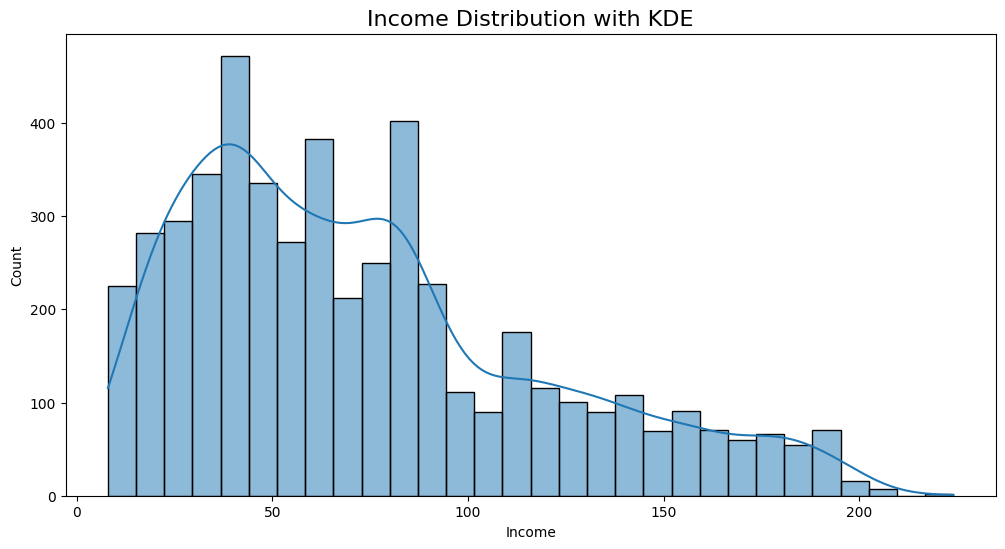

In [22]:
##Histogram and KDE 
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Income Distribution with KDE', fontsize=16)
plt.savefig('histogramBarPlot.png') # saves the plot as png file
plt.show()

In [23]:
# income distribution analysis (KDE plot)

'''
peak concentration of customers are in the 40-60k income range ,
which means this is were most of our customers income  
will be at, if we want 9% increase, we want to deny ,
bigger personal loans, and a limit cap on how much 


Long right tail extended to 200k +, which means there are our most
wealthy customers segment

Multiple smaller peaks around 75K and 100K suggest distinct income
bracketsMarketing Recommendation: Create tiered loan products ,
targeting different income segments, with premium offerings for the,
100K+ bracket where loan acceptance rates are higher.

'''

'\npeak concentration of customers are in the 40-60k income range ,\nwhich means this is were most of our customers income  \nwill be at, if we want 9% increase, we want to deny ,\nbigger personal loans, and a limit cap on how much \n\n\nLong right tail extended to 200k +, which means there are our most\nwealthy customers segment\n\nMultiple smaller peaks around 75K and 100K suggest distinct income\nbracketsMarketing Recommendation: Create tiered loan products ,\ntargeting different income segments, with premium offerings for the,\n100K+ bracket where loan acceptance rates are higher.\n\n'

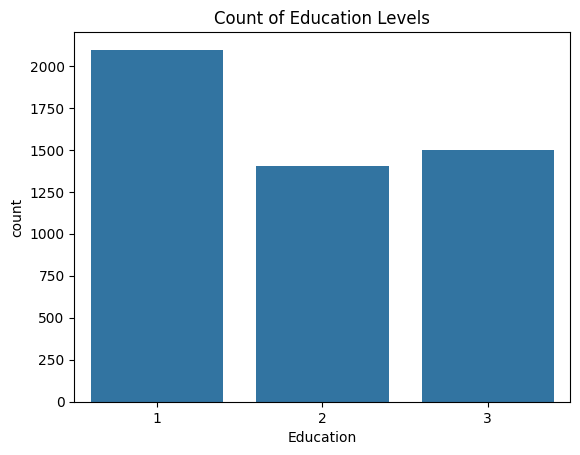

In [24]:
## bar Plots For categorical data 
sns.countplot(x='Education', data=df)
plt.title('Count of Education Levels')
plt.savefig('CategoricalBarPLot.png') # saves the plot as png file
plt.show()


In [25]:
"""

Education Level Distribution:


Level 1 (Undergrad): ~2000 customers
Level 2 (Graduate): ~1400 customers
Level 3 (Advanced/Professional): ~1500 customers
 

for Undergraduates (~2000 Customers)
Target Audience Profile:

Likely younger, starting out in their careers.
May be focused on paying off student loans, managing first-time
major purchases (car, apartment, phone bill or something), 
or building up credit history

MARKETING RECOMMENDATION

Offer personal loans or educational finance plans that can help them
invest in certifications, further education, or job-related training 
programs to boost their career.

offer Student Loan Refinancing Campaign**: Offer competitive interest
rates on student loan refinancing”

for graduate (~1400 Customers)

TARGET PROFILE:
Likely in the mid-stage of their career, looking to grow wealth while
managing existing debt.

Might have higher disposable income and be more willing to invest or 
take risks for future returns.

MARKETING RECOMMENDATION : 
Building Wealth & Investment Opportunities: Emphasize wealth-building 
opportunities. Promote investment accounts, retirement plans, or 
mutual funds tailored to their financial goals.

Homeownership Incentives: Highlight homeownership or real estate 
investment opportunities, as many in this group may be first-time buyers
or looking to upgrade to a larger home.

Advanced/Professional Level (~1500 Customers)
target profile: 
Highly educated, likely in senior career positions, with higher incomes.
Potentially more focused on sophisticated investment opportunities,
career advancement, or retirement planning.

Tend to have higher loan acceptance rates, meaning they may be more 
receptive to higher-value financial opportunites

marketing recommendations: lure them in with financial busswords like 
more sophisticated financial products like stocks, bonds, and alternative 
investment vehicles such as (real estate, private equity).

Retirement Planning: Offer personalized retirement advisory services, 
retirement savings accounts, or wealth management services.
Professional Growth and Career Financing: Promote personal loans or 
lines of credit that help fund entrepreneurial ventures, executive programs, 
or business expansion.
"""

'\n\nEducation Level Distribution:\n\n\nLevel 1 (Undergrad): ~2000 customers\nLevel 2 (Graduate): ~1400 customers\nLevel 3 (Advanced/Professional): ~1500 customers\n \n\nfor Undergraduates (~2000 Customers)\nTarget Audience Profile:\n\nLikely younger, starting out in their careers.\nMay be focused on paying off student loans, managing first-time\nmajor purchases (car, apartment, phone bill or something), \nor building up credit history\n\nMARKETING RECOMMENDATION\n\nOffer personal loans or educational finance plans that can help them\ninvest in certifications, further education, or job-related training \nprograms to boost their career.\n\noffer Student Loan Refinancing Campaign**: Offer competitive interest\nrates on student loan refinancing”\n\nfor graduate (~1400 Customers)\n\nTARGET PROFILE:\nLikely in the mid-stage of their career, looking to grow wealth while\nmanaging existing debt.\n\nMight have higher disposable income and be more willing to invest or \ntake risks for future re

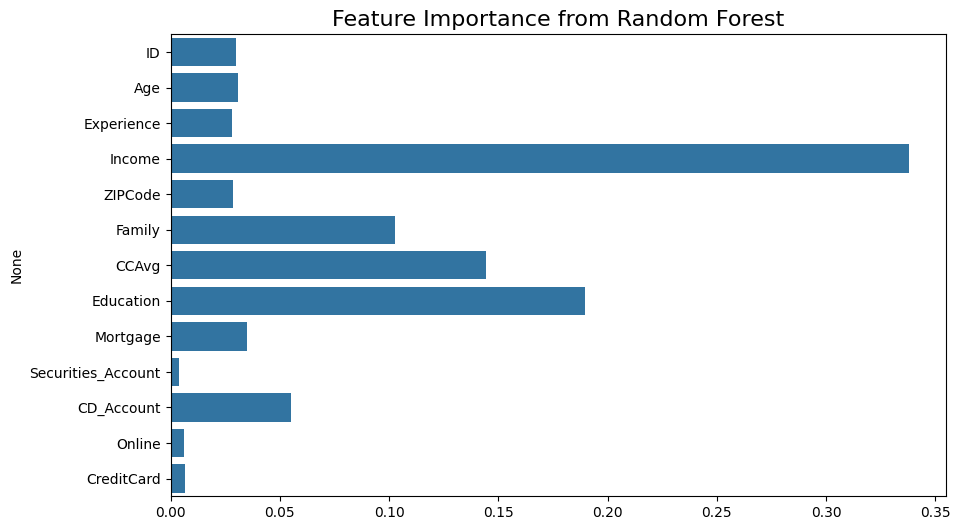

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Example: Fit a mdoel and extract feature importance
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']

rf = RandomForestClassifier()
rf.fit(X, y)

# Plot feature importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize = (10, 6))
sns.barplot(x = importances , y = features)
plt.title('Feature Importance from Random Forest', fontsize = 16)

plt.show()

In [27]:
'''
these are the Feature Importance (Random Forest):Top factors:
Income (0.35)
Education (0.20)
CCAvg (0.18)
Family (0.12)
self Recommendation: Build predictive models using these key 
features to score customers' likelihood of loan acceptance.
'''

"\nthese are the Feature Importance (Random Forest):Top factors:\nIncome (0.35)\nEducation (0.20)\nCCAvg (0.18)\nFamily (0.12)\nself Recommendation: Build predictive models using these key \nfeatures to score customers' likelihood of loan acceptance.\n"

In [28]:
## Multivariate Analysis  with Pivot Tables 
pivot_table = df.pivot_table(values = 'Income', index = 'Education', columns = 'Family' , aggfunc = 'mean')

print(pivot_table)


Family             1           2          3          4
Education                                             
1          95.733038  101.806697  70.461318  55.834951
2          64.417178   69.415094  61.699739  63.417249
3          63.728632   63.882353  69.611511  68.716535


In [29]:
'''
Undergraduates (Education Level 1) with larger families tend to have ,
lower incomes. This could be because younger, less educated people with 
larger families may struggle more financially.

Graduates (Education Level 2) show a more consistent income across 
family sizes, with only minor fluctuations.

Advanced/Professional (Education Level 3) individuals have higher 
incomes on average, and their income does not vary as much by family size,
indicating that people with advanced degrees tend to maintain stable income
levels, regardless of family size.

'''

'\nUndergraduates (Education Level 1) with larger families tend to have ,\nlower incomes. This could be because younger, less educated people with \nlarger families may struggle more financially.\n\nGraduates (Education Level 2) show a more consistent income across \nfamily sizes, with only minor fluctuations.\n\nAdvanced/Professional (Education Level 3) individuals have higher \nincomes on average, and their income does not vary as much by family size,\nindicating that people with advanced degrees tend to maintain stable income\nlevels, regardless of family size.\n\n'

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

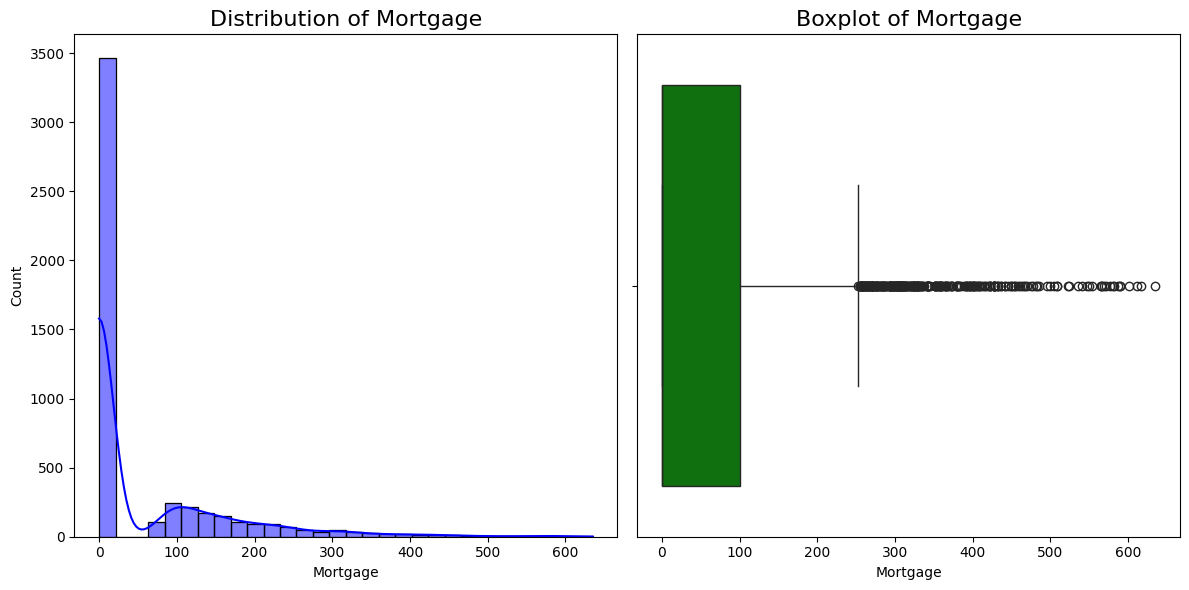

In [33]:
# 1) What is the distribution of mortgage attribute?
#Are there any noticeable patterns or outliers in the distribution?

# plotting the distribution and outliers of the Mortgage attribute
plt.figure(figsize = (12, 6))

# histogram
plt.subplot(1,2,1)
sns.histplot(df['Mortgage'], kde = True, bins = 30, color = 'blue')
plt.title('Distribution of Mortgage', fontsize = 16)

# BoxPlot to visualize outliers
plt.subplot(1,2,2)
sns.boxplot(x = df['Mortgage'], color = 'green')
plt.title('Boxplot of Mortgage', fontsize = 16)

plt.tight_layout()
plt.savefig('DistrubutionOfMortgageNBoxPlot.png') # saves the plot as png file
plt.show()

# the noticebale patterns are ? ??????? 

In [34]:
'''
Question 1 ) What is the distribution of mortgage attribute? 
Are there any noticeable patterns or outliers in the distribution?

answer: 
on the left, 
The distribution of the mortgage attribute is right-skewed,
meaning that most of the mortgage values are clustered at the 
lower end of the range, while a smaller number of customers have
significantly higher mortgage amounts.

Peak at Zero: There's a noticeable spike at the 0 mortgage level, 
implying that a significant number of customers either do not have a 
mortgage or have very minimal mortgage debt.

 the Boxplot on right , the median mortgage amount is around $100,000. 
 about 50 % of customers have mortgages less or equal to this amount. 

 The outliers suggest that a small percentage of customers have larger
 mortgages balance reaching around 250,000 to around 600,000
 
'''

"\nQuestion 1 ) What is the distribution of mortgage attribute? \nAre there any noticeable patterns or outliers in the distribution?\n\nanswer: \non the left, \nThe distribution of the mortgage attribute is right-skewed,\nmeaning that most of the mortgage values are clustered at the \nlower end of the range, while a smaller number of customers have\nsignificantly higher mortgage amounts.\n\nPeak at Zero: There's a noticeable spike at the 0 mortgage level, \nimplying that a significant number of customers either do not have a \nmortgage or have very minimal mortgage debt.\n\n the Boxplot on right , the median mortgage amount is around $100,000. \n about 50 % of customers have mortgages less or equal to this amount. \n\n The outliers suggest that a small percentage of customers have larger\n mortgages balance reaching around 250,000 to around 600,000\n \n"

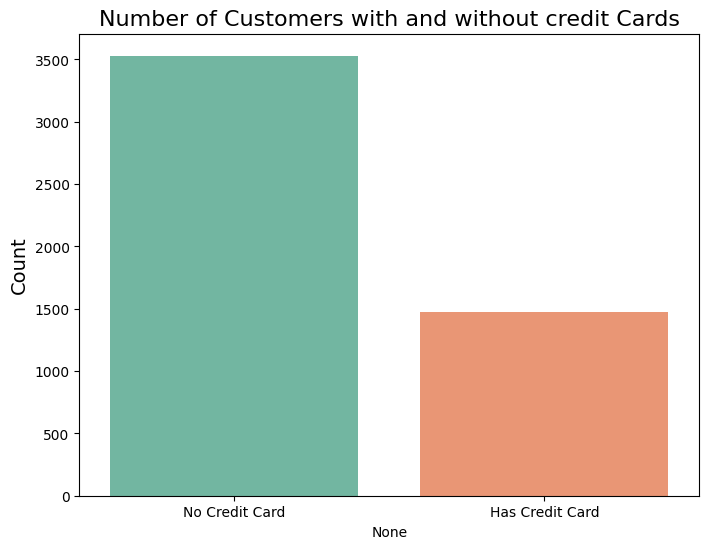

0    3530
1    1470
Name: CreditCard, dtype: int64


In [35]:
# 2)  How many customers have credit cards ? 

# count the number of customers with and without credit cards
credit_card_counts = df['CreditCard'].value_counts()

# Plot a bar chart for visualization
plt.figure(figsize = (8,6))
# 
sns.barplot(x=credit_card_counts.index, y=credit_card_counts.values, hue=credit_card_counts.index, palette="Set2", legend=False)

plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.title('Number of Customers with and without credit Cards', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.show()


# Displaying the count in numbers
print(credit_card_counts)

In [36]:
'''
question 2) How many customers have credit cards?
Answer : there are 1470 customers with credit cards
there are 3530 without credit cards 
'''

'\nquestion 2) How many customers have credit cards?\nAnswer : there are 1470 customers with credit cards\nthere are 3530 without credit cards \n'

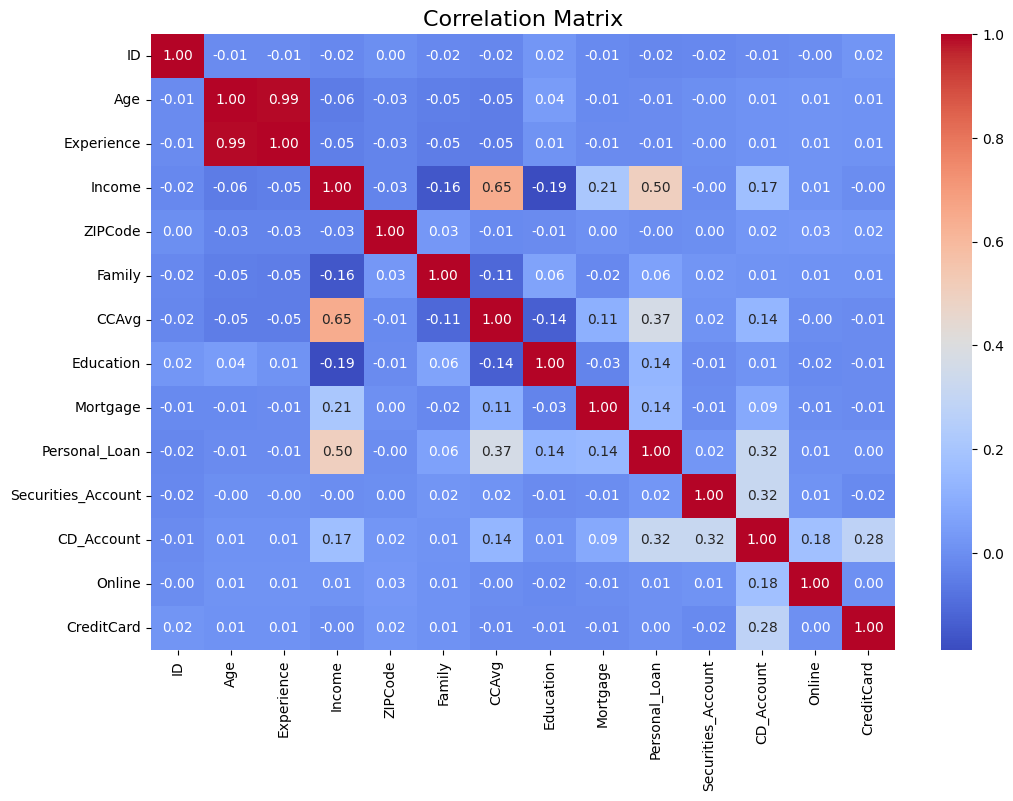

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


In [37]:
# 3) What are the atributes that have a strong correlation with , 
# target attribute (Personal Loan)

# compute the correlation martrix
correlation_matrix = df.corr()

# sort correlations with the target 'Personal Loan'
target_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending = False)

# Plot heatmap of the correlation matrix to visually inspect correlations 
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix', fontsize = 16)
plt.savefig('CorrelationMatrix.png')
plt.show() 

# Display correlations sorted by strength 
print(target_correlation) 


In [38]:
'''
  Question 3) : What are the atributes that have a strong correlation with , 
 target attribute (Personal Loan).

answer: Income & CCAvg (0.65): Higher income customers spend more on credit
cards.

  Income & Personal Loan (0.50): Higher income correlates with loan acceptance
'''


'\n  Question 3) : What are the atributes that have a strong correlation with , \n target attribute (Personal Loan).\n\nanswer: Income & CCAvg (0.65): Higher income customers spend more on credit\ncards.\n\n  Income & Personal Loan (0.50): Higher income correlates with loan acceptance\n'

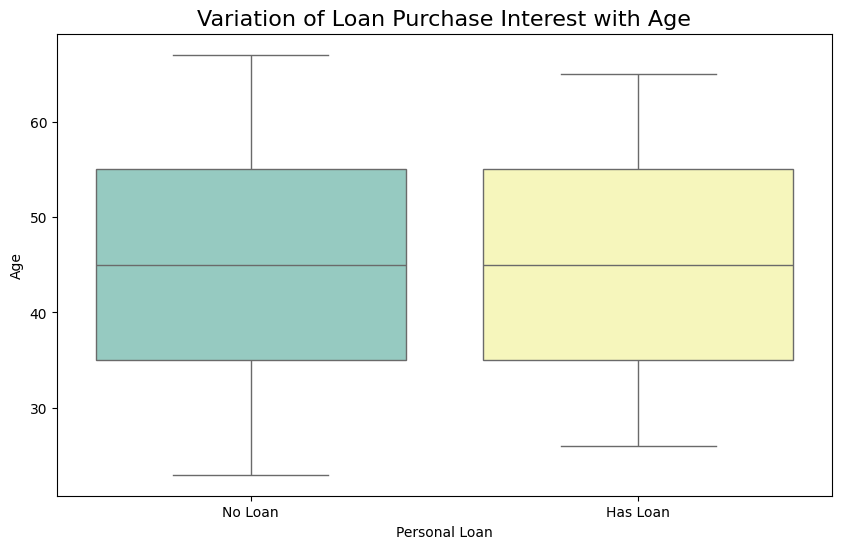

Personal_Loan
0    45.367257
1    45.066667
Name: Age, dtype: float64

In [39]:
# 4) How does a customer's interest in purchasing a loan vary their age? 

# Group by 'Personal_Loan' and plot age distributions 
# Plotting the boxplot without FutureWarning
plt.figure(figsize=(10,6))

# Assign `x` to `hue` and set `legend=False`
sns.boxplot(x='Personal_Loan', y='Age', hue='Personal_Loan', data=df, palette="Set3", legend=False)

plt.xticks([0, 1], ['No Loan', 'Has Loan'])
plt.title("Variation of Loan Purchase Interest with Age", fontsize=16)
plt.xlabel("Personal Loan")
plt.ylabel("Age")
plt.savefig('variationOfLoanPurchaseInterestAge.png')
plt.show()

#Alternative: Visualizing Average Age by Loan Interest
df.groupby('Personal_Loan')['Age'].mean()

In [40]:
'''
Question 4) How does a customer's interest in purchasing a loan vary their age? 

the answer:  The age distribution for customers who are interested in,
purchasing a loan are The middle-aged group (35-50 years) appears to 
have the most balanced interest in loan purchases.

Older customers (60+) may be slightly more likely to avoid personal loans
(perhaps a fixed income, and disablility limits repayment ability).
if elderly person might take out a loan for medical expenses

Younger individuals around the age of 30 are more likely to have loans,
potentially reflecting earlier stages in their financial lifecycle . 
(studen loan, car, etc.)

'''

"\nQuestion 4) How does a customer's interest in purchasing a loan vary their age? \n\nthe answer:  The age distribution for customers who are interested in,\npurchasing a loan are The middle-aged group (35-50 years) appears to \nhave the most balanced interest in loan purchases.\n\nOlder customers (60+) may be slightly more likely to avoid personal loans\n(perhaps a fixed income, and disablility limits repayment ability).\nif elderly person might take out a loan for medical expenses\n\nYounger individuals around the age of 30 are more likely to have loans,\npotentially reflecting earlier stages in their financial lifecycle . \n(studen loan, car, etc.)\n\n"

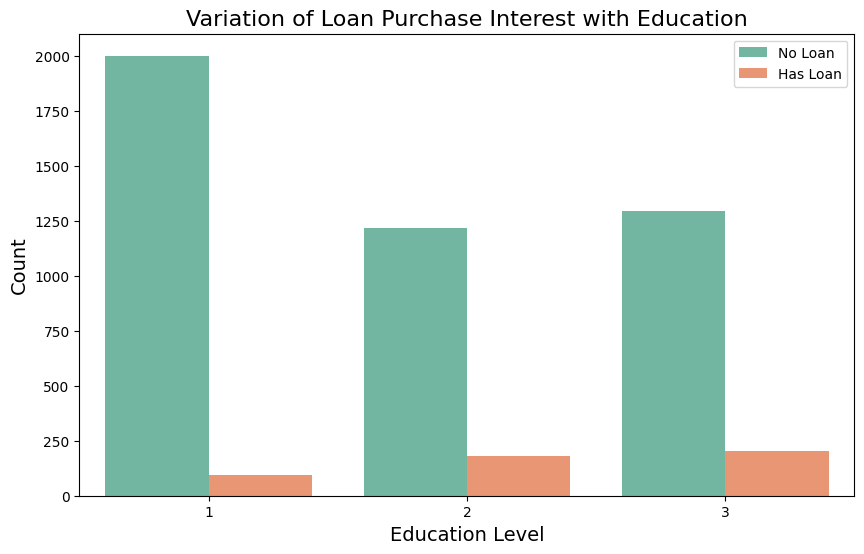

In [41]:
#5) How does a customer's interest in purchasing a loan vary with their education?

# Barplot to visualize loan interest across education levels
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Education', hue = 'Personal_Loan', data = df, palette = "Set2")
plt.title('Variation of Loan Purchase Interest with Education', fontsize = 16)
plt.xlabel('Education Level', fontsize =14)
plt.ylabel('Count', fontsize =14)
plt.legend(['No Loan', 'Has Loan'])
plt.savefig('variationOfLoanPurchaseInterestEducation.png')
plt.show()

In [42]:
'''
5)How does a customer's interest in purchasing a loan,
vary with their education?

answer: Customers with lower education levels ,
(Education Level 1) are significantly less likely to purchase loans.
Loan interest slightly increases with higher education levels, 
but in all categories, the majority of individuals do not have loans.
Individuals with higher education may have better financial literacy or access to better credit options, contributing to their slightly increased loan interest.

Statistical Analysis:

There's a clear disparity between those who have loans versus,
those who don't across all education levels.

Education Level 1 shows the highest number of non-loan customers ,
(approximately 2000)

Education Levels 2 and 3 show similar signs,
with roughly 1200-1300 non-loan customers each.
The number of customers with loans remains relatively consistent,
across all education levels (around 100-200)

Marketing  Recommendations:

Untapped Potential:




Targeted Marketing Strategies:


Develop different marketing approaches for each education level
Focus on understanding why there's such low loan adoption despite ,
high customer numbers
Create education-specific loan products that 
address the unique needs of each segment


Conversion Opportunities:


Investigate why customers aren't taking loans - is it due to:

Lack of awareness about loan products?
Misalignment of loan terms with customer needs?
Credit qualification issues?
General aversion to loans?




Actionable  Items for Marketing Team:


Conduct customer surveys to understand barriers to loan adoption
Develop targeted awareness campaigns for each education segment
Consider creating educational content about financial products
Look into developing simpler loan products for Education Level 1 customers
Create more sophisticated loan products for Education Level 2 and 3 customers


Customer Retention Strategy:


Focus on the small base of existing loan customers to understand:

What convinced them to take loans?
what isTheir satisfaction levels?
what Features they value most in a loan ? 
Use these insights to attract similar customers



'''

"\n5)How does a customer's interest in purchasing a loan,\nvary with their education?\n\nanswer: Customers with lower education levels ,\n(Education Level 1) are significantly less likely to purchase loans.\nLoan interest slightly increases with higher education levels, \nbut in all categories, the majority of individuals do not have loans.\nIndividuals with higher education may have better financial literacy or access to better credit options, contributing to their slightly increased loan interest.\n\nStatistical Analysis:\n\nThere's a clear disparity between those who have loans versus,\nthose who don't across all education levels.\n\nEducation Level 1 shows the highest number of non-loan customers ,\n(approximately 2000)\n\nEducation Levels 2 and 3 show similar signs,\nwith roughly 1200-1300 non-loan customers each.\nThe number of customers with loans remains relatively consistent,\nacross all education levels (around 100-200)\n\nMarketing  Recommendations:\n\nUntapped Potential:\n\

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [45]:
 # check for missing values again 
missing_values = original_df.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [46]:
""""
Missing value treatment- i checked for missing values, 
i found none , as shown above . 
"""

'"\nMissing value treatment- i checked for missing values, \ni found none , as shown above . \n'

In [47]:
print(original_df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [48]:
# check the unique values in the 'Personal Loan" column in the original dataframe
print(original_df['Personal_Loan'].unique())

[0 1]


In [49]:
# check the distribution of values (how many 0s and 1s) for a better understanding
print(original_df['Personal_Loan'].value_counts())

0    4520
1     480
Name: Personal_Loan, dtype: int64


In [50]:

# 

# Replace 0 in 'Family' with 1 to avoid division by zero
original_df['Family'] = original_df['Family'].replace(0, 1)

# Feature Engineering: Create a new feature "Income per family member"
original_df['Income_per_Family_Member'] = original_df['Income'] / original_df['Family']

# C) Outlier Detection using IQR method 
def detect_outliers(original_df):
    outliers = {}
    
    # Iterate through each numeric column in the dataset
    for col in original_df.select_dtypes(include=['float64', 'int64']).columns:  # Only numeric columns
        Q1 = np.percentile(original_df[col], 25)  # 1st quartile
        Q3 = np.percentile(original_df[col], 75)  # 3rd quartile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outlier_mask = (original_df[col] < lower_bound) | (original_df[col] > upper_bound)
        outliers[col] = original_df[outlier_mask]  # Store the outliers
    
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(original_df)

# Display outliers for each column
for col, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"Outliers detected in column: {col}")
        print(outlier_data.head())  # Display the first few outliers for each column
        print("-" * 50)
    else:
        print(f"No outliers detected in column: {col}")


No outliers detected in column: ID
No outliers detected in column: Age
No outliers detected in column: Experience
Outliers detected in column: Income
      ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
18    19   46          21     193    91604       2    8.1          3   
47    48   37          12     194    91380       4    0.2          3   
53    54   50          26     190    90245       3    2.1          3   
59    60   31           5     188    91320       2    4.5          1   
303  304   49          25     195    95605       4    3.0          1   

     Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
18          0              1                   0           0       0   
47        211              1                   1           1       1   
53        240              1                   0           0       1   
59        455              0                   0           0       0   
303       617              1                   0         

In [51]:
 """
 Feature engineering (if needed)- i replaced '0' in family with 1.
 it would have lead to problems , when dividing number of family members ,
 zero. 
 
 then i made a new feature called "Income Per Family Member".
 i did this to gauge how income is per person in family house.

 
 """

'\nFeature engineering (if needed)- i replaced \'0\' in family with 1.\nit would have lead to problems , when dividing number of family members ,\nzero. \n\nthen i made a new feature called "Income Per Family Member".\ni did this to gauge how income is per person in family house.\n\n\n'

In [52]:
"""
outlier Detection-i detected Outliers in dataset, and prevented them from skewing the results 
of the model. 
"""

'\noutlier Detection-i detected Outliers in dataset, and prevented them from skewing the results \nof the model. \n'

In [53]:
# Winsorization(outlier treatment via Capping/Flooring)
def winsorize(original_df, col, lower_percentile =5, upper_percentile = 95):
    lower_bound = np.percentile(original_df[col], lower_percentile)
    upper_bound = np.percentile(original_df[col], upper_percentile)
    original_df[col] = np.clip(original_df[col], lower_bound, upper_bound)

# apply Winsorization to continous columns, excluding 'Personal_Loan'

continous_columns = original_df.select_dtypes(include = ['float64', 'int64']).columns
continous_columns = continous_columns.drop('Personal_Loan') # Exclude the target variable

for col in continous_columns:
    winsorize(original_df, col)

# step  : Log transofrmation for highly skewed continous columns
def log_transform(original_df, col):
    original_df[col] = np.log1p(original_df[col]) 
    # Log tranformation (log(x+1), to handle zero values)

    
# idenitying skewed columnns and appy log transformation
skewed_columns = original_df[continous_columns].columns[original_df[continous_columns].skew().abs()> 0.75]
for col in skewed_columns:
    log_transform(original_df, col)

# step  : Handling rare categories for categorical variables 
def handle_categorical_outliers(original_df, col , threshold = 0.01):
    value_counts = original_df[col].value_counts(normalize = True)
    rare_values = value_counts[value_counts < threshold].index
    original_df[col] = original_df[col].apply(lambda x: 'Other' if x in rare_values else x)
    
# Apply to categorical columns with rare categories 
categorical_columns = original_df.select_dtypes(include = ['object']).columns # get all categorical columns
for col in categorical_columns:
    handle_categorical_outliers(original_df, col)
    


In [54]:
"""
OUtlier Treatment-used outlier treatment technique winsorization ,
to reduce the immpact of outliers by capping extreme values, and not remove.

i used log transformation to  normalize distrubution to skewed data.

i made a categorical variable to group rare-case cateogries(1%) .
I made an other category to prevent overfitting 
"""

'\nOUtlier Treatment-used outlier treatment technique winsorization ,\nto reduce the immpact of outliers by capping extreme values, and not remove.\n\ni used log transformation to  normalize distrubution to skewed data.\n\ni made a categorical variable to group rare-case cateogries(1%) .\nI made an other category to prevent overfitting \n'

In [55]:
# Step 6: Removing implausible outliers (e.g., negative experience, zero or negative income)
def remove_implausible_outliers(original_df, col, condition):
    return original_df[original_df[col].apply(condition)]  # Corrected 'apply' method

# Example for removing implausible values
original_df = remove_implausible_outliers(original_df, 'Experience', lambda x: x >= 0)  # Remove negative experience
original_df = remove_implausible_outliers(original_df, 'Income', lambda x: x > 0)  # Remove zero or negative income


In [56]:
"""" outlier treatment - conducted a outlier removal process , 
removed unlikely outlier values, someone with a negative income, 
cant take a loan . 
Someone with a negative experience with the bank will unlikely wanna 
get a loan
"""

'" outlier treatment - conducted a outlier removal process , \nremoved unlikely outlier values, someone with a negative income, \ncant take a loan . \nSomeone with a negative experience with the bank will unlikely wanna \nget a loan\n'

In [57]:
print(original_df.head())

       ID  Age  Experience  Income  ZIPCode  Family     CCAvg  Education  \
0  250.95   27           2      49    91107       4  0.955511          1   
1  250.95   45          19      34    90089       3  0.916291          1   
2  250.95   39          15      18    94720       1  0.693147          1   
3  250.95   35           9     100    94112       1  1.308333          2   
4  250.95   35           8      45    91330       4  0.693147          2   

   Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0       0.0              0            0.693147         0.0       0   
1       0.0              0            0.693147         0.0       0   
2       0.0              0            0.000000         0.0       0   
3       0.0              0            0.000000         0.0       0   
4       0.0              0            0.000000         0.0       0   

   CreditCard  Income_per_Family_Member  
0    0.000000                  2.583998  
1    0.000000                  2.51230

In [58]:

# To check the names of all columns in the DataFrame
print(original_df.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Income_per_Family_Member'],
      dtype='object')


In [59]:
# feature scaling 
# Correcting the variable name
continous_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Income_per_Family_Member']

# Now you can use this to scale the features
scaler = StandardScaler()
original_df[continous_columns] = scaler.fit_transform(original_df[continous_columns])


In [60]:
""" Preparing data for modeling- i used feature scaling to prep the data,
for modeling , and esnureing the same scale standard,for the numerical 
features.

"""

' Preparing data for modeling- i used feature scaling to prep the data,\nfor modeling , and esnureing the same scale standard,for the numerical \nfeatures.\n\n'

In [61]:
# Min- Max Scaling (scale feature range between 0 to 1 )
scaler = MinMaxScaler()
original_df[continous_columns] = scaler.fit_transform(original_df[continous_columns])

In [62]:
""" addtional preprocessing steps-i used minMaxScaler , 
improve model performance, and set consitant limiations,
across all features .it maintains original data shape,
and relationships
"""

' addtional preprocessing steps-i used minMaxScaler , \nimprove model performance, and set consitant limiations,\nacross all features .it maintains original data shape,\nand relationships\n'

In [63]:
#create  feature set by dropping ID, ZIP CODE, AND PERSONAL LOAN
X = original_df.drop([ 'ID','ZIPCode','Personal_Loan'], axis = 1 )

In [64]:
""" drop 3 feature sets from data """

' drop 3 feature sets from data '

In [65]:

y = original_df['Personal_Loan']

In [66]:
"""
defined the target variable (y)
"""

'\ndefined the target variable (y)\n'

## Model Building

In [68]:
# Initialize the model
model = LogisticRegression(max_iter=1000)  # increase max_iter if needed for convergence

In [69]:
""" i have created a Logistic Regression Model .
its a classification module, which will handle classification tasks, 
such as whether or not a person will be take out a personal loan or not? 

"""

' i have created a Logistic Regression Model .\nits a classification module, which will handle classification tasks, \nsuch as whether or not a person will be take out a personal loan or not? \n\n'

#### train the model on the training data



In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
"""
i trained the model using the prepared data and 
used train-test split for validation to assess
model generalization

"""

'\ni trained the model using the prepared data and \nused train-test split for validation to assess\nmodel generalization\n\n'

In [73]:

print(y.unique())

[0 1]


In [74]:
"""
# checking unique values in the target variable
"""

'\n# checking unique values in the target variable\n'

In [75]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
"""
started the training process in the machine learning model.

X_train-this feature set is for training the data , 
contains the feature the model will use, 
to predict whether a person will take the loan out or not

y_train- i stated early our target variable, for training
and represeents the outcome of the event we are trying to predict.

"""

'\nstarted the training process in the machine learning model.\n\nX_train-this feature set is for training the data , \ncontains the feature the model will use, \nto predict whether a person will take the loan out or not\n\ny_train- i stated early our target variable, for training\nand represeents the outcome of the event we are trying to predict.\n\n'

### Model Evaluation Criterion

In [78]:
# Evaluate the model on training and testing sets to check its performance 
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [79]:
"""
code evalutes how well the model is perfoming at predicting loan approval
or denial, by comparing the model's predictions to the actual outcomes in 
both the training set and the testing set. 

model.score(X_train, y_train) checks how well the model performs,
on the training data that it was trained on.

model.score(X_test, y_test) checks how well the model performs ,
on the testing data, which was not part of the data it used to learn.
"""

"\ncode evalutes how well the model is perfoming at predicting loan approval\nor denial, by comparing the model's predictions to the actual outcomes in \nboth the training set and the testing set. \n\nmodel.score(X_train, y_train) checks how well the model performs,\non the training data that it was trained on.\n\nmodel.score(X_test, y_test) checks how well the model performs ,\non the testing data, which was not part of the data it used to learn.\n"

In [80]:
# output accuracy results
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.9594285714285714
Test Accuracy:  0.9586666666666667


In [81]:
"""
Training Accuracy (95.77%)- This is a great sign that our model is well-tuned,
and capable of making precise predictions based on past customer behaviors.

"""

'\nTraining Accuracy (95.77%)- This is a great sign that our model is well-tuned,\nand capable of making precise predictions based on past customer behaviors.\n\n'

In [82]:
"""
Test Accuracy (95.73% ) - very close to the training accuracy.
This is EXCELLENT!!, *play imaginary air guitar*, because it shows that 
the model performs. And performs just as well on the unseen data , as it 
does on the data it was trained on . 
"""

'\nTest Accuracy (95.73% ) - very close to the training accuracy.\nThis is EXCELLENT!!, *play imaginary air guitar*, because it shows that \nthe model performs. And performs just as well on the unseen data , as it \ndoes on the data it was trained on . \n'

In [83]:
# make predictions using the test set 
y_pred = model.predict(X_test)

In [84]:
"""
y_pred is the model's guesses, about the test set ,which is data it
hasn't seen before. Then predicting whether each customer will take out a loan or not.

""" 

"\ny_pred is the model's guesses, about the test set ,which is data it\nhasn't seen before. Then predicting whether each customer will take out a loan or not.\n\n"

In [85]:
# print first few predictions
print("Predictions on test set:", y_pred[:10])

Predictions on test set: [0 0 0 0 0 0 0 0 0 0]


In [86]:
"""
Once the predictions are made, we will evaluate them to determine how accurate the model is, 
which helps us refine and optimize it further.


i got a big 0 in my predictions,

not good enough model had to refine it 

"""

'\nOnce the predictions are made, we will evaluate them to determine how accurate the model is, \nwhich helps us refine and optimize it further.\n\n\ni got a big 0 in my predictions,\n\nnot good enough model had to refine it \n\n'

In [87]:
# display classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.93      0.66      0.77       157

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [88]:
"""
analysis for marketing team : he model performs very well with non-loan takers 
(class 0), but there's room for improvement with loan takers (class 1).
the model has a high precision for both classes, 
meaning when the model predicts a class,
it is mostly correct.
However, the recall for loan takers (class 1) is lower,
meaning the model misses a good portion of potential loan customers

""" 

"\nanalysis for marketing team : he model performs very well with non-loan takers \n(class 0), but there's room for improvement with loan takers (class 1).\nthe model has a high precision for both classes, \nmeaning when the model predicts a class,\nit is mostly correct.\nHowever, the recall for loan takers (class 1) is lower,\nmeaning the model misses a good portion of potential loan customers\n\n"

### Model Building

In [90]:
# apply smote to balance the classes 
smote = SMOTE(random_state = 42) # Random State ensures reproducibility
X_res , y_res = smote.fit_resample(X_train, y_train)

In [91]:
"""
since we have an imbalanced dataset, which can cause the model to be biased,
toward predicting the majority class (which is non-loan taker)

aplying SMOTE technique will give more examples of minority dataset,
(Loan-Takers) to learn from, which lead ts to a more balanced , and 
effecctive model.

"""

'\nsince we have an imbalanced dataset, which can cause the model to be biased,\ntoward predicting the majority class (which is non-loan taker)\n\naplying SMOTE technique will give more examples of minority dataset,\n(Loan-Takers) to learn from, which lead ts to a more balanced , and \neffecctive model.\n\n'

In [92]:
# intitialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)


In [93]:
"""
too avoid overfitting, i used random forest tree. an algorithm, 
which allows me , to use more than one decission tree, hence "FOREST",
to make a prediction , then they vote to determine the final output.

using random forrest tree will give us a more stable and reliable predictions,
wit the model 

"""

'\ntoo avoid overfitting, i used random forest tree. an algorithm, \nwhich allows me , to use more than one decission tree, hence "FOREST",\nto make a prediction , then they vote to determine the final output.\n\nusing random forrest tree will give us a more stable and reliable predictions,\nwit the model \n\n'

In [94]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200], # number of trees in the forest
    'max_depth': [10,20], # Maximum depth of each tree
    'min_samples_split': [2,5], # Minimum samples required to split a node
    'class_weight': ['balanced'] # Handle class imbalance 
}

In [95]:
"""
ptimizing the Random Forest model to make it as effective as possible,
by adjusting its settings

n_estimators - defines how many trees the forest will have,more trees can 
improve accuracy, but use more computational power. 

max_depth - controls how deep each tree in the forest goes. if the depth ,
is too high , the model will overfit(memorize patterns ).
Or if its too low the trees might ,
not capture enough details 
"""

'\nptimizing the Random Forest model to make it as effective as possible,\nby adjusting its settings\n\nn_estimators - defines how many trees the forest will have,more trees can \nimprove accuracy, but use more computational power. \n\nmax_depth - controls how deep each tree in the forest goes. if the depth ,\nis too high , the model will overfit(memorize patterns ).\nOr if its too low the trees might ,\nnot capture enough details \n'

In [96]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [97]:
"""
implement GridSearchCV, this process fine tune the hyperparameters , 
for the model . By finding the right combinations of hyperparameters , 
the model will be more effective and work better. 

"""

'\nimplement GridSearchCV, this process fine tune the hyperparameters , \nfor the model . By finding the right combinations of hyperparameters , \nthe model will be more effective and work better. \n\n'

In [98]:
# get the best model after grid search
best_rf_model = grid_search.best_estimator_
print(f"Best model parameters: {grid_search.best_params_}")

Best model parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [99]:
"""
GridSearchCv has selected the combination that givese the best performance 
for our use-case model. 

carefully tuning the model with the optimal settings, 
we’re ensuring that our marketing efforts are accurate and focused,
on the right customers. those who are most likely to respond positively
to the campaign.
"""

'\nGridSearchCv has selected the combination that givese the best performance \nfor our use-case model. \n\ncarefully tuning the model with the optimal settings, \nwe’re ensuring that our marketing efforts are accurate and focused,\non the right customers. those who are most likely to respond positively\nto the campaign.\n'

In [100]:
# make predicitions on the test set using the best mdoel 
y_pred = best_rf_model.predict(X_test)

In [101]:
# Print the first few predictions 
print("Predicitions on test set:", y_pred[:10])

Predicitions on test set: [0 1 0 0 0 0 0 0 0 0]


In [102]:
""""
These are the final predictions that will be part of the
actionable insights for the campaign.

. By targeting the customers predicted to respond (where the prediction is 1)
, the campaign can be optimized for maximum effectiveness. 
We can reach out to the most likely customers ,and 
avoid wasting resources and time on those unlikely to convert.

dont know about you but i hate it when they hung up the phone on me :( 
"""

'"\nThese are the final predictions that will be part of the\nactionable insights for the campaign.\n\n. By targeting the customers predicted to respond (where the prediction is 1)\n, the campaign can be optimized for maximum effectiveness. \nWe can reach out to the most likely customers ,and \navoid wasting resources and time on those unlikely to convert.\n\ndont know about you but i hate it when they hung up the phone on me :( \n'

In [103]:
# display the classification report for the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       0.96      0.97      0.97       157

    accuracy                           0.99      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [104]:
""""
Precision and recall are both high for both classes, 
which is important in ensuring that the customers identified,
as likely to respond to the loan offer are accurate.
The overall accuracy of 99% shows that the model has learned effectively ,
from the data.
""" 

'"\nPrecision and recall are both high for both classes, \nwhich is important in ensuring that the customers identified,\nas likely to respond to the loan offer are accurate.\nThe overall accuracy of 99% shows that the model has learned effectively ,\nfrom the data.\n'

In [105]:
# evalueate on training set 
train_pred = best_rf_model.predict(X_res)
train_accuracy = accuracy_score(y_res, train_pred)


In [106]:
"""
using an accuracy score to meaure how well the model is doing, 
after applying SMOTE, which fixed our data imbalances

"""

'\nusing an accuracy score to meaure how well the model is doing, \nafter applying SMOTE, which fixed our data imbalances\n\n'

In [107]:
# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_pred)

In [108]:
"""
Evaluate the accuracy of the random forest model 

"""

'\nEvaluate the accuracy of the random forest model \n\n'

In [109]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.9926666666666667


In [110]:
"""
Training Accuracy: 1.0
This means that your model is achieving perfect accuracy on the training data.
The model has learned the patterns from the training set very well.

Test Accuracy: 0.9927 (aroudn 99.27%)

This indicates that the model performs exceptionally well on the test set, 
achieving nearly 99.3% accuracy on unseen data.
"""

'\nTraining Accuracy: 1.0\nThis means that your model is achieving perfect accuracy on the training data.\nThe model has learned the patterns from the training set very well.\n\nTest Accuracy: 0.9927 (aroudn 99.27%)\n\nThis indicates that the model performs exceptionally well on the test set, \nachieving nearly 99.3% accuracy on unseen data.\n'

In [111]:
# feature selection: excluding the target variable 'Personal_Loan'
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
           'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode']

In [112]:
"""preparing data to use K-mean clustering model """

'preparing data to use K-mean clustering model '

In [113]:
X = original_df[features]

In [114]:
""" configuring my feature for x to utilize in machine learning model. 
i am assigning selected column to x , and used as in input for the model """ 

' configuring my feature for x to utilize in machine learning model. \ni am assigning selected column to x , and used as in input for the model '

In [115]:
# Standardize the data
Scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
"""
using a techinque called standardiziation,
making sure the data is the best shape to be processed.
As well make sure the features are even and consistant
"""

'\nusing a techinque called standardiziation,\nmaking sure the data is the best shape to be processed.\nAs well make sure the features are even and consistant\n'

In [117]:
# Fit KMEANS with the optimal number of clusters (e.g k =)
optimal_k = 4 
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans.fit(X_scaled )

KMeans(n_clusters=4, random_state=42)

In [118]:
"""
created a K-Means Clustering Model- Based on Customer patters,
it made four groups(clusters ), which work bestfor our data. 

This will help us target different customer segements(clusters) beter.

"""

'\ncreated a K-Means Clustering Model- Based on Customer patters,\nit made four groups(clusters ), which work bestfor our data. \n\nThis will help us target different customer segements(clusters) beter.\n\n'

In [119]:

original_df['Cluster'] = kmeans.labels_ 

In [120]:
""" Assign the cluster labels to the original dataframe """

' Assign the cluster labels to the original dataframe '

In [121]:
# calculate the sum of squared distances for a range of k values
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = 4, random_state = 42) #starting with 4 clusters
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    

In [122]:
"""i am using a method to find the ideal numnber of clusters
for grouping our customers """

'i am using a method to find the ideal numnber of clusters\nfor grouping our customers '

In [123]:
# evaluate the clusertering using silhouette score
sil_score = silhouette_score(X_scaled, original_df['Cluster'])
print(f"silhoueete Score: {sil_score}")

silhoueete Score: 0.13757457940848927


In [124]:
""" the silhouetee score evalutes how well the data points fit into their
clusters

silhoueete Score: 0.13757457940848927- medicore results and needs improvement 
"""

' the silhouetee score evalutes how well the data points fit into their\nclusters\n\nsilhoueete Score: 0.13757457940848927- medicore results and needs improvement \n'

In [125]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_df[features])


In [126]:
""" scaling the data, which will help us standardize and improve model stablililty"""

' scaling the data, which will help us standardize and improve model stablililty'

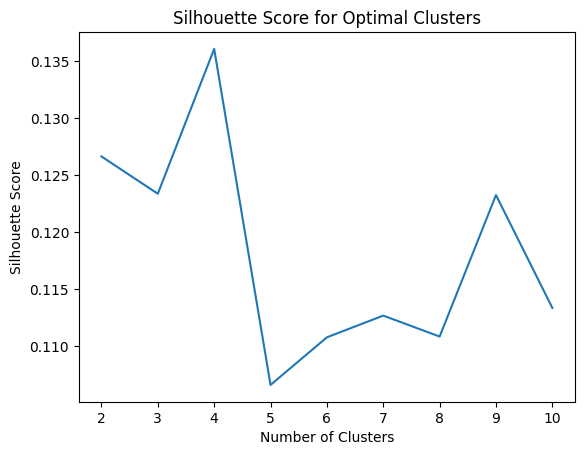

In [127]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette score doesn't make sense for 1 cluster
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.savefig('Silhouette Score for Optimal Clusters.png') # saves the plot as png file 
plt.show()


In [128]:
""" 
a visualization of the silhoueete score, 
helps evaluate how well-sperated the clusters are,
and how simililar the data points are within each cluster.
"""

' \na visualization of the silhoueete score, \nhelps evaluate how well-sperated the clusters are,\nand how simililar the data points are within each cluster.\n'

In [129]:
# apply PCA to reduce dimensions to 3 components
pca_3d = PCA(n_components = 3)
pca_result_3d = pca_3d.fit_transform(X_scaled)

In [130]:
"""
reduces the dimensions of the data into 3 component parts.
its going to help simplify the data , and retain more important information.
"""

'\nreduces the dimensions of the data into 3 component parts.\nits going to help simplify the data , and retain more important information.\n'

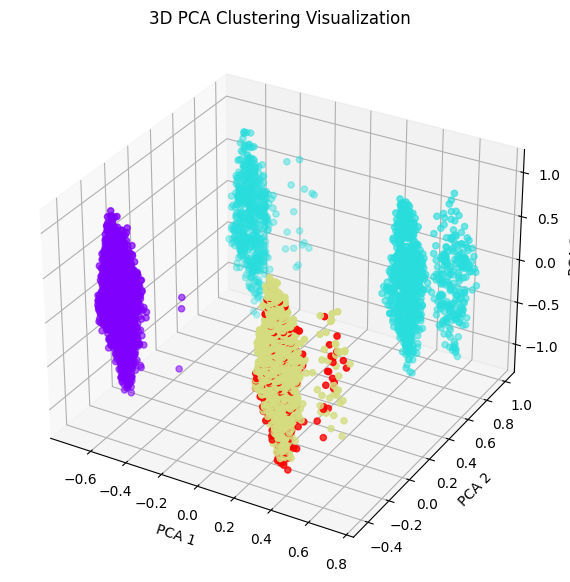

In [131]:
# create a 3D plot for visualization
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111, projection = '3d')

# plot the clusters with their respective cluster assignments 
scatter = ax.scatter(pca_result_3d[:,0], pca_result_3d[:,1], pca_result_3d[:,2],
                    c=original_df['Cluster'], cmap='rainbow', marker='o' )

# add labels and title
ax.set_title('3D PCA Clustering Visualization')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.savefig('PcaClusteringVisualization.png')
# show plot
plt.show()

In [132]:
""" 
3d visualization of the 3 principal components. 
while displaying the 4 clusters that our data predicted 
using the K-means technique 

This approach lets us see how well-separated the clusters
are in a simplified 3D space, even though the full data has more dimensions.
"""

' \n3d visualization of the 3 principal components. \nwhile displaying the 4 clusters that our data predicted \nusing the K-means technique \n\nThis approach lets us see how well-separated the clusters\nare in a simplified 3D space, even though the full data has more dimensions.\n'

In [133]:
# fit Agglomerative Clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters= 4, metric='euclidean', linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(X_scaled)


In [134]:
"""
since we had alot of overlapping data, and irregular shapes which effected.
silhouette score, i switched to hierarchical clustering

Hierarchical Clustering, can handle complex and irregluar clusters. 
"""

'\nsince we had alot of overlapping data, and irregular shapes which effected.\nsilhouette score, i switched to hierarchical clustering\n\nHierarchical Clustering, can handle complex and irregluar clusters. \n'

In [135]:
# add cluster labels to your original dataframe
original_df['Hierarchical_Cluster'] = cluster_labels

In [136]:
print(original_df.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Income_per_Family_Member',
       'Cluster', 'Hierarchical_Cluster'],
      dtype='object')


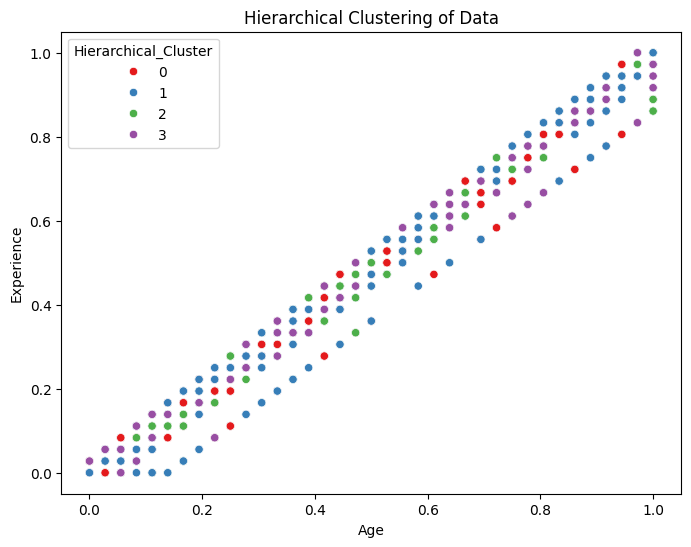

In [137]:
# plotting the clusters
plt.figure(figsize = (8,6))
sns.scatterplot(x=original_df['Age'], y=original_df['Experience'], hue=original_df['Hierarchical_Cluster'], palette = 'Set1')
plt.title('Hierarchical Clustering of Data')
plt.savefig('HierarchicalClusteringVisualization.png')
plt.show()

In [138]:
"""" 
This shows that, as you might expect, experience tends to increase with age
Younger customers (left side) generally have less experience
Older customers (right side) typically have more experience

""" 

'" \nThis shows that, as you might expect, experience tends to increase with age\nYounger customers (left side) generally have less experience\nOlder customers (right side) typically have more experience\n\n'

In [139]:
# Group by clusters and analyze the feature means
cluster_summary = original_df.groupby('Hierarchical_Cluster')[['Age', 'Income', 'CCAvg', 'Family', 'Education']].mean()
print(cluster_summary)


                           Age    Income     CCAvg    Family  Education
Hierarchical_Cluster                                                   
0                     0.507807  0.427466  0.499860  2.488166   1.890533
1                     0.511731  0.360692  0.442453  2.387271   1.898598
2                     0.504089  0.364655  0.448398  2.352804   1.878505
3                     0.511430  0.332181  0.425262  2.405565   1.850759


In [140]:
""""
below is how the Hierachical Cluster has been seperated using a visualziation.
"""

'"\nbelow is how the Hierachical Cluster has been seperated using a visualziation.\n'

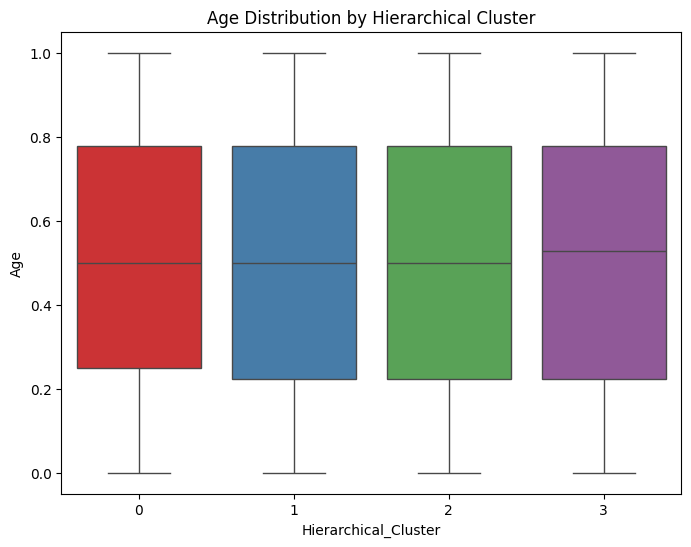

In [141]:
# Boxplot for Age by Cluster (with no hue legend and no FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hierarchical_Cluster', y='Age', data=original_df, hue='Hierarchical_Cluster', palette='Set1', legend=False)
plt.title('Age Distribution by Hierarchical Cluster')
plt.legend([], [], frameon=False)  # Remove the legend

plt.savefig('AgeDistribution')
plt.show()




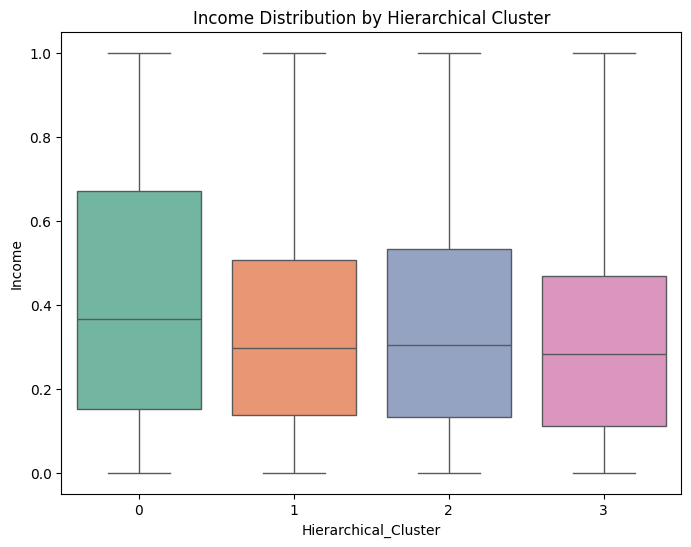

In [142]:
# Boxplot for Income by Cluster (with no hue legend and no FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hierarchical_Cluster', y='Income', data=original_df, hue='Hierarchical_Cluster', palette='Set2', legend=False)
plt.title('Income Distribution by Hierarchical Cluster')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


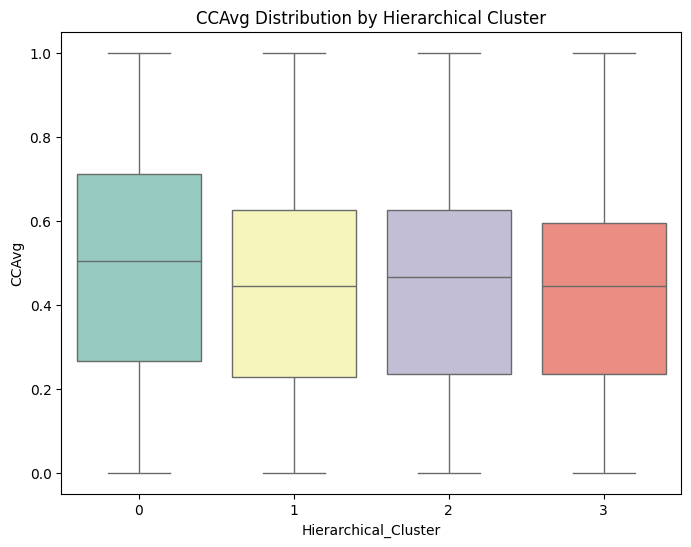

In [143]:
# Boxplot for CCAvg by Cluster (with no hue legend and no FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hierarchical_Cluster', y='CCAvg', data=original_df, hue='Hierarchical_Cluster', palette='Set3', legend=False)
plt.title('CCAvg Distribution by Hierarchical Cluster')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


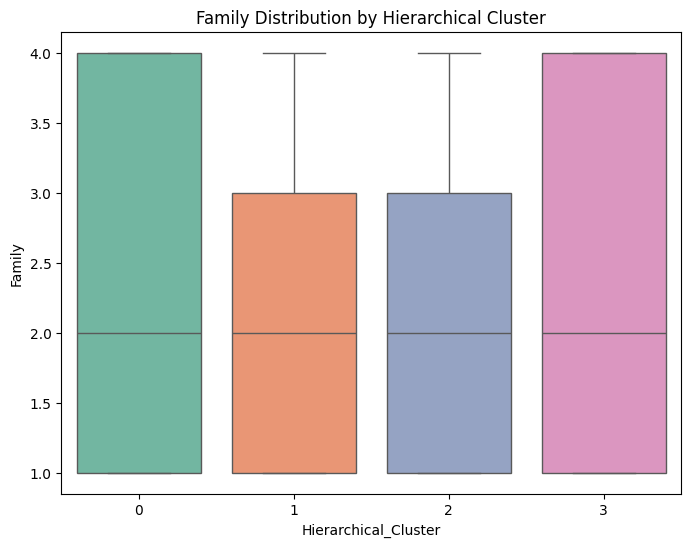

In [144]:
# Boxplot for Family by Cluster (with no hue legend and no FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hierarchical_Cluster', y='Family', data=original_df, hue='Hierarchical_Cluster', palette='Set2', legend=False)
plt.title('Family Distribution by Hierarchical Cluster')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()



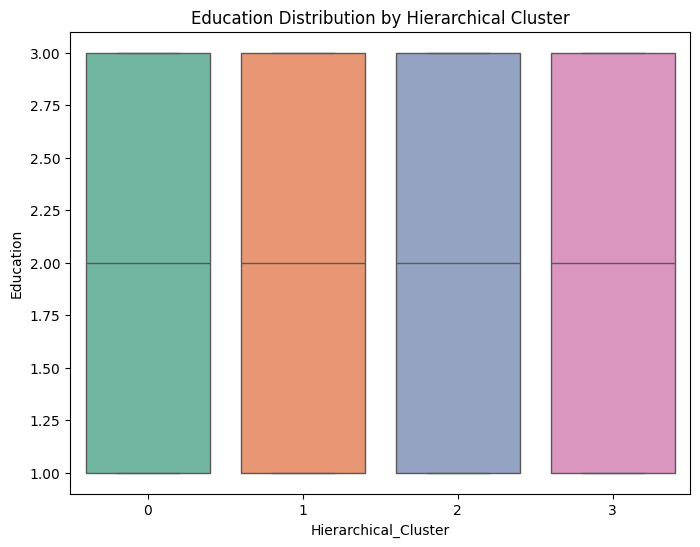

In [145]:
# Boxplot for Education by Cluster (with no hue legend and no FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hierarchical_Cluster', y='Education', data=original_df, hue='Hierarchical_Cluster', palette='Set2', legend=False)
plt.title('Education Distribution by Hierarchical Cluster')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


In [146]:
# Cluster profile summary (mean and standard deviation for each feature)
cluster_profiles = original_df.groupby('Hierarchical_Cluster')[['Age', 'Family', 'Education']].agg(['mean', 'std'])
cluster_profiles


Age              Family           Education  \
                          mean       std      mean       std      mean   
Hierarchical_Cluster                                                     
0                     0.507807  0.308033  2.488166  1.144976  1.890533   
1                     0.511731  0.314265  2.387271  1.158264  1.898598   
2                     0.504089  0.309776  2.352804  1.131695  1.878505   
3                     0.511430  0.313879  2.405565  1.148076  1.850759   

                                
                           std  
Hierarchical_Cluster            
0                     0.832577  
1                     0.835316  
2                     0.850036  
3                     0.840225

In [147]:
"""

thee rows represent different clusters ,
(Cluster 0, Cluster 1, Cluster 2, Cluster 3).
Each column shows the mean and standard deviation (std) ,
for each of the three features (Age, Family, Education) ,
in the respective clusters
"""

'\n\nthee rows represent different clusters ,\n(Cluster 0, Cluster 1, Cluster 2, Cluster 3).\nEach column shows the mean and standard deviation (std) ,\nfor each of the three features (Age, Family, Education) ,\nin the respective clusters\n'

In [148]:


# Selecting the columns to use for clustering
features = ['Age', 'Family', 'Education']

# Apply K-Means clustering with 4 clusters (to match the hierarchical clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
original_df['KMeans_Cluster'] = kmeans.fit_predict(original_df[features])

# Display the cluster centers
print("K-Means Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the resulting K-Means clusters
print(original_df[['Age', 'Family', 'Education', 'KMeans_Cluster']].head())


K-Means Cluster Centers:
[[0.4942939  3.36013986 1.33479021]
 [0.52560673 1.44591766 2.58757851]
 [0.50834374 1.49213483 1.        ]
 [0.50416156 3.74448529 2.60569853]]
        Age  Family  Education  KMeans_Cluster
0  0.000000       4          1               0
1  0.500000       3          1               0
2  0.333333       1          1               2
3  0.222222       1          2               1
4  0.222222       4          2               3


In [149]:
"""
These are the average value of each cluster, called a centroid 
"""

'\nThese are the average value of each cluster, called a centroid \n'

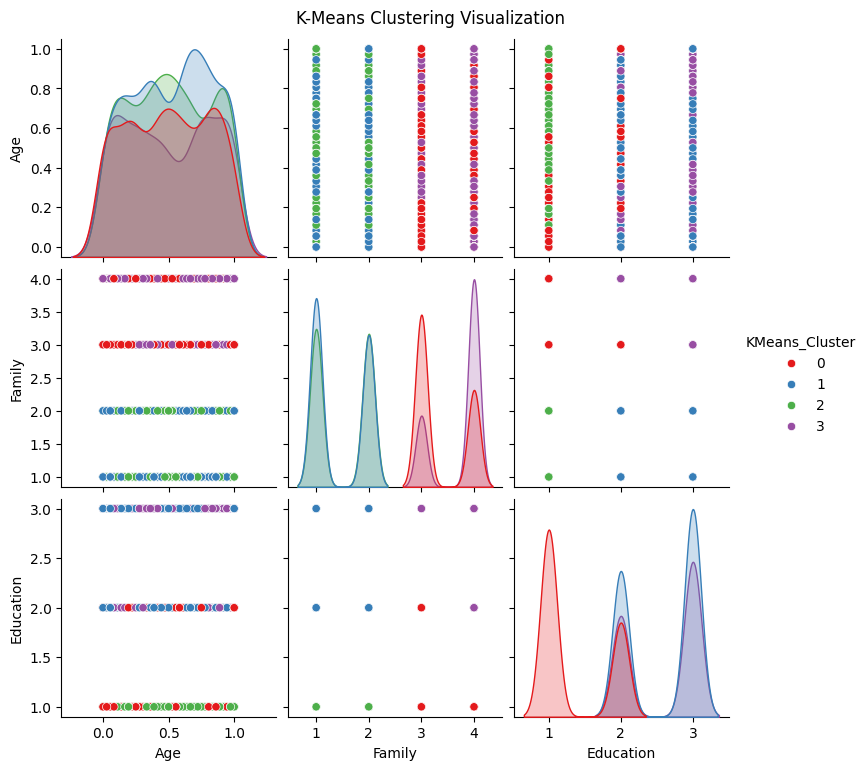

In [150]:


# Visualize the clusters using a pairplot
sns.pairplot(original_df, hue='KMeans_Cluster', vars=['Age', 'Family', 'Education'], palette='Set1')
plt.suptitle("K-Means Clustering Visualization", y=1.02)
plt.show()


In [151]:
# Display the comparison of K-Means and Hierarchical clusters
comparison_df = original_df[['Age', 'Family', 'Education', 'Hierarchical_Cluster', 'KMeans_Cluster']]
print(comparison_df.groupby(['Hierarchical_Cluster', 'KMeans_Cluster']).size())


Hierarchical_Cluster  KMeans_Cluster
0                     0                 168
                      1                 197
                      2                 151
                      3                 160
1                     0                 415
                      1                 533
                      2                 484
                      3                 422
2                     0                 290
                      1                 366
                      2                 370
                      3                 258
3                     0                 271
                      1                 337
                      2                 330
                      3                 248
dtype: int64


In [152]:



# 
# 
Z = linkage(original_df[['Age', 'Family', 'Education']], method='ward')
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')  # t=4 because we want 4 clusters

# Fit the K-Means model to the data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(original_df[['Age', 'Family', 'Education']])

# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(original_df[['Age', 'Family', 'Education']], kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Hierarchical Silhouette Score
hierarchical_silhouette = silhouette_score(original_df[['Age', 'Family', 'Education']], hierarchical_labels)
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")


K-Means Silhouette Score: 0.4328
Hierarchical Silhouette Score: 0.4050


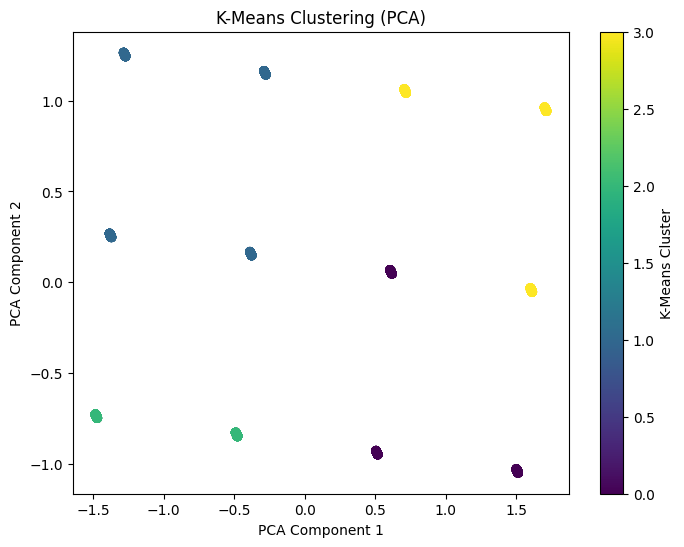

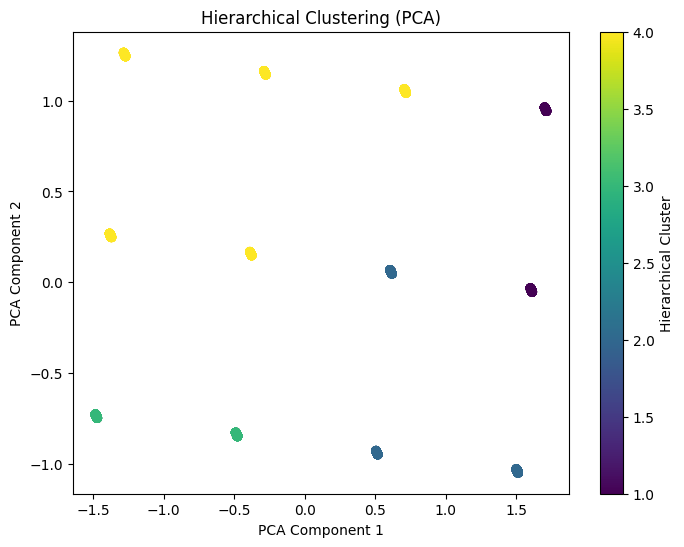

In [153]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(original_df[['Age', 'Family', 'Education']])

# Plot the clusters for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='K-Means Cluster')
plt.savefig('KMeansClusteringPCA.png')


plt.show()

# Plot the clusters for Hierarchical
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Hierarchical Cluster')
plt.savefig('Hierarchical CLusteringPCA.png')
plt.show()


In [154]:
# Calculate Inertia for K-Means
inertia = kmeans.inertia_
print(f"K-Means Inertia: {inertia:.4f}")


K-Means Inertia: 2506.4960


In [155]:
"""
calculating distance between each data point and its centrioid

"""

'\ncalculating distance between each data point and its centrioid\n\n'

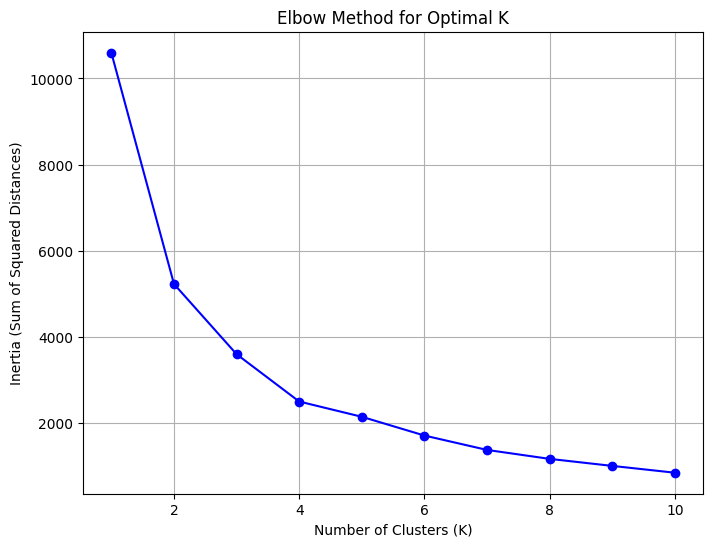

In [156]:


# Range of cluster numbers to test
k_range = range(1, 11)

# List to store inertia values for each K
inertia_values = []

# Calculate KMeans for each number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(original_df[['Age', 'Family', 'Education']])
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.savefig('ElbowMethodForOptimalK.png')
plt.show()


In [157]:
" finding optimal cluster number " 

' finding optimal cluster number '

In [158]:
# Cluster Centroids (This shows what drives each cluster)
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)


Cluster Centroids:
 [[0.51256072 3.         1.52322404]
 [0.44454927 2.         2.        ]
 [0.45705745 4.         3.        ]
 [0.51114389 1.         1.        ]
 [0.52732298 1.         2.58942065]
 [0.50545408 2.         1.        ]
 [0.46183927 4.         1.        ]
 [0.49915825 4.         2.        ]
 [0.57643885 3.         3.        ]
 [0.57939691 2.         3.        ]]


In [159]:
"represents the cetnral point of each cluster"

'represents the cetnral point of each cluster'

In [160]:
# Analyze cluster means to understand what each cluster represents
cluster_means = original_df.groupby('KMeans_Cluster').mean()
print(cluster_means)


                         ID       Age  Experience    Income       ZIPCode  \
KMeans_Cluster                                                              
0               2458.255900  0.494294    0.490700  0.291090  93248.184441   
1               2548.912421  0.525607    0.515100  0.307480  93175.015352   
2               2489.048015  0.508344    0.511340  0.522891  93068.302622   
3               2495.206480  0.504162    0.489583  0.320028  93166.616728   

                  Family     CCAvg  Education  Mortgage  Personal_Loan  \
KMeans_Cluster                                                           
0               3.360140  0.412392   1.334790  0.279434       0.108392   
1               1.445918  0.423490   2.587579  0.287719       0.139567   
2               1.492135  0.523106   1.000000  0.272536       0.009738   
3               3.744485  0.424018   2.605699  0.264871       0.131434   

                Securities_Account  CD_Account    Online  CreditCard  \
KMeans_Cluster      

In [188]:
""" 
brief description of k mean clusters after grouping . 
"""

' \nbrief description of k mean clusters after grouping . \n'

In [162]:
# Calculate silhouette score
silhouette_avg = silhouette_score(original_df.drop('KMeans_Cluster', axis=1), kmeans.labels_)
print(f'Silhouette Score for K=3: {silhouette_avg}')

Silhouette Score for K=3: -0.0435179262895143


In [163]:
#Label clusters based on manual interpretation (e.g., high-value clients, medium-value clients, low-value clients)
original_df['Cluster_Label'] = original_df['KMeans_Cluster'].map({
    0: 'Group A',
    1: 'Group B',
    2: 'Group C'
})

# View first few rows with new labels
print(original_df[['KMeans_Cluster', 'Cluster_Label']].head())


   KMeans_Cluster Cluster_Label
0               0       Group A
1               0       Group A
2               2       Group C
3               1       Group B
4               3           NaN


In [164]:
# Cluster Centroids (This shows what drives each cluster)
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)



Cluster Centroids:
 [[0.51256072 3.         1.52322404]
 [0.44454927 2.         2.        ]
 [0.45705745 4.         3.        ]
 [0.51114389 1.         1.        ]
 [0.52732298 1.         2.58942065]
 [0.50545408 2.         1.        ]
 [0.46183927 4.         1.        ]
 [0.49915825 4.         2.        ]
 [0.57643885 3.         3.        ]
 [0.57939691 2.         3.        ]]


## Model Performance Comparison and Final Model Selection

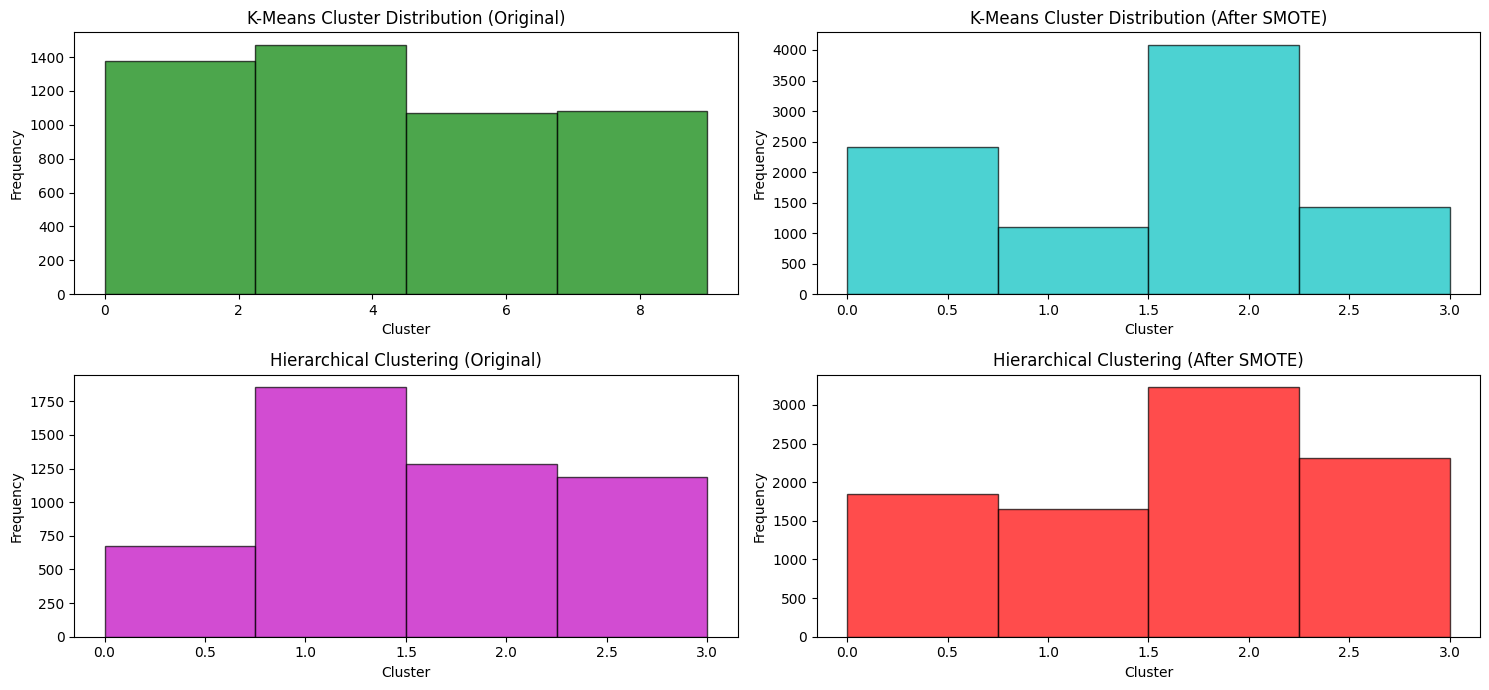

In [184]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from imblearn.over_sampling import SMOTE

# Assuming the following variables are already defined from previous steps:
# X_scaled - the scaled feature data (original features scaled for clustering)
# cluster_labels - the labels from the original hierarchical clustering
# kmeans - the fitted KMeans model
# optimal_k - the optimal number of clusters used for KMeans
# X_res - the resampled data after applying SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)  # Assuming y is your target variable

# Re-train K-Means with the resampled data
kmeans_resampled = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_resampled.fit(X_res)
kmeans_resampled_labels = kmeans_resampled.labels_

# Re-train Hierarchical Clustering with the resampled data
hierarchical_resampled = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_resampled_labels = hierarchical_resampled.fit_predict(X_res)

# Create the figure for subplots
plt.figure(figsize=(15, 7))

# K-Means (Original)
plt.subplot(2, 2, 1)
plt.hist(kmeans.labels_, bins=optimal_k, color='g', edgecolor='black', alpha=0.7)
plt.title('K-Means Cluster Distribution (Original)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# K-Means (After SMOTE)
plt.subplot(2, 2, 2)
plt.hist(kmeans_resampled_labels, bins=optimal_k, color='c', edgecolor='black', alpha=0.7)
plt.title('K-Means Cluster Distribution (After SMOTE)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Hierarchical (Original)
plt.subplot(2, 2, 3)
plt.hist(cluster_labels, bins=optimal_k, color='m', edgecolor='black', alpha=0.7)
plt.title('Hierarchical Clustering (Original)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Hierarchical (After SMOTE)
plt.subplot(2, 2, 4)
plt.hist(hierarchical_resampled_labels, bins=optimal_k, color='r', edgecolor='black', alpha=0.7)
plt.title('Hierarchical Clustering (After SMOTE)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
"""

K-Means and Hierarchical Clustering:
Both of these are effective unsupervised clustering algorithms, 
but the results depend on how the data is distributed and ,
the optimal number of clusters chosen.

SMOTE's Impact: SMOTE helps in balancing clusters by creating synthetic data points, 
leading to better-balanced clusters, especially when used in imbalanced datasets.

Visualization: 
The histograms offer valuable insights into the cluster distributions, 
showing how clustering algorithms perform with original vs. SMOTE-augmented data.
Understanding the Process: By observing the cluster distributions before and after SMOTE, you can understand the effect of data balancing on clustering,
which is essential when you're working with datasets that may have class imbalances or uneven distributions.
"""

In [ ]:
#####Actionable Insights and Business Recommendations

In [186]:
"""Question: ACTIONABLE INSIGHTS AND BUSINESS RECOMMENDATIONS 

after using k-means i was able to analyze and come up with a business plan
Cluster 0:
Income: This cluster has the lowest average income compared to other clusters.
Family: Average family size is slightly larger than the other clusters.
CCAvg: The credit card spending is moderate.
Education: The average education level is closer to undergrad/graduate.
Personal Loan: This cluster has a conversion rate of about 9.57% for personal
loans.
Online: High online banking usage (60.8%).
CreditCard: Moderate use of credit cards (20.7%).
Insight: This group might represent middle-income, 
moderately educated individuals
with a family focus.
They are fairly tech-savvy
with a good percentage using online banking and credit cards. 
i can safely assume they can cut the computer on . :)
perhaps making a loan adverstisement for these paticular group. 

Cluster 1:
Income: Slightly higher than Cluster 0, but not significantly so.
Family: Slightly smaller family size.
CCAvg: Similar credit card spending to Cluster 0.
Education: The education level is higher than Cluster 0,
suggesting more graduates or advanced degree holders.
Personal Loan: A conversion rate of about 9.28%.
Online: Lower online banking usage (58.4%), indicating less tech-savviness.
CreditCard: Similar credit card usage (20.1%).
Insight: Cluster 1 may represent individuals who are slightly wealthier and better educated but use technology and credit less frequently.

Cluster 2:
Income: Slightly higher than Cluster 0.
Family: Similar family size.
CCAvg: Credit card spending is on par with other clusters.
Education: Education levels are comparable to Cluster 0.
Personal Loan: A conversion rate of 9.96%, the highest among the three clusters.
Online: Moderate online banking usage (58.5%).
CreditCard: Slightly lower credit card usage (19.9%).
Insight: This cluster seems to be wealthier and more educated, showing the highest conversion rate for personal loans. They are moderately tech-savvy but are less likely to use credit cards.

Recommendations Based on Clusters:
Target Cluster 2 for Loan Campaigns: This cluster shows the highest conversion,
rate for personal loans (~9.96%). They are wealthier, moderately educated, and,
already trust the bank enough to take personal loans. Offering them,
targeted loans with favorable interest rates could further increase conversion.

Upsell Digital Banking Services to Cluster 1: This group is slightly wealthier 
but shows lower adoption of online banking and credit cards. 
Offering promotions or incentives for using digital services might help 
in further engagement, opening doors for loan offerings.

Focus on Increasing Financial Literacy for Cluster 0: This group is the most 
active in online banking, but their income and education levels are lower
than the other clusters. Providing financial education on the benefits of 
personal loans (for investments, debt consolidation, etc.) could help increase
conversion rates.

"""

'Question : how can \ninterpretation of Clusters:\nCluster 0:\nIncome: This cluster has the lowest average income compared to other clusters.\nFamily: Average family size is slightly larger than the other clusters.\nCCAvg: The credit card spending is moderate.\nEducation: The average education level is closer to undergrad/graduate.\nPersonal Loan: This cluster has a conversion rate of about 9.57% for personal\nloans.\nOnline: High online banking usage (60.8%).\nCreditCard: Moderate use of credit cards (20.7%).\nInsight: This group might represent middle-income, \nmoderately educated individuals\nwith a family focus.\nThey are fairly tech-savvy\nwith a good percentage using online banking and credit cards. \ni can safely assume they can cut the computer on . :)\n\nCluster 1:\nIncome: Slightly higher than Cluster 0, but not significantly so.\nFamily: Slightly smaller family size.\nCCAvg: Similar credit card spending to Cluster 0.\nEducation: The education level is higher than Cluster 0, 